In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler


In [ ]:
data=pd.read_csv("/content/aqi_up.csv")
data

city        date  pm25  pm10   o3  no2  so2   co
0      thiruvananthapuram  01-06-2025    48    24    6    5    5    2
1      thiruvananthapuram  02-06-2025    45    23    6    5    6    2
2      thiruvananthapuram  03-06-2025    44    22    6    6    6    3
3      thiruvananthapuram  04-06-2025    44    33    6    6    6    2
4      thiruvananthapuram  05-06-2025    63    44    6    5    6    2
...                   ...         ...   ...   ...  ...  ...  ...  ...
76217               noida  2019/12/10         249   28   57    7   20
76218               noida   2019/9/13          49   14    7    6   10
76219               noida  2018/12/31         339   37   61    7   25
76220               noida  2018/11/29         241   56   53   10   15
76221               noida  2018/12/14         149   28   43    4    9

[76222 rows x 8 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76222 entries, 0 to 76221
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   city    76222 non-null  object
 1   date    76222 non-null  object
 2    pm25   76222 non-null  object
 3    pm10   76222 non-null  object
 4    o3     76222 non-null  object
 5    no2    76222 non-null  object
 6    so2    76222 non-null  object
 7    co     76222 non-null  object
dtypes: object(8)
memory usage: 4.7+ MB


In [ ]:



data.columns = data.columns.str.strip().str.lower()


for col in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
    if col in data.columns:
        data[col] = (
            data[col]
            .astype(str)
            .str.extract(r'([\d\.]+)')[0]
            .astype(float)
        )
data['date'] = pd.to_datetime(data['date'],format='mixed')


In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76222 entries, 0 to 76221
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   city    76222 non-null  object        
 1   date    76222 non-null  datetime64[ns]
 2   pm25    74168 non-null  float64       
 3   pm10    70888 non-null  float64       
 4   o3      72034 non-null  float64       
 5   no2     69679 non-null  float64       
 6   so2     68915 non-null  float64       
 7   co      71983 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 4.7+ MB


In [ ]:
data.describe()


date          pm25          pm10  \
count                          76222  74168.000000  70888.000000   
mean   2022-04-25 19:22:37.497835520    110.373881     75.210882   
min              2014-09-15 00:00:00      1.000000      1.000000   
25%              2020-10-23 00:00:00     70.000000     43.000000   
50%              2022-07-20 00:00:00    103.000000     64.000000   
75%              2024-01-24 00:00:00    145.000000     91.000000   
max              2025-12-06 00:00:00    999.000000    999.000000   
std                              NaN     58.957845     57.514809   

                 o3           no2           so2            co  
count  72034.000000  69679.000000  68915.000000  71983.000000  
mean      19.397951     11.218689      6.435812      6.842157  
min        1.000000      1.000000      1.000000      1.000000  
25%        8.000000      4.000000      2.000000      4.000000  
50%       15.000000      8.000000      4.000000      6.000000  
75%       26.000000     15.000000      8.000000      9.000000  
max      500.000000    133.000000    500.000000    500.000000  
std       18.935123     10.739587      9.022727      5.942968

In [ ]:
data.isna().sum()

city       0
date       0
pm25    2054
pm10    5334
o3      4188
no2     6543
so2     7307
co      4239
dtype: int64

In [ ]:
data['city'].unique()


array(['thiruvananthapuram', 'kolkata', 'mumbai', 'delhi', 'chennai',
       'bengaluru', 'lucknow', 'jaipur', 'hyderabad', 'patna', 'dispur',
       'amaravati', 'itanagar', 'bengal', 'punjab', 'indore', 'udaipur',
       'ahmedabad', 'dindigul', 'coimbatore', 'kochi', 'mysuru', 'kannur',
       'mangalore', 'visakhapatnam', 'varanasi', 'patiala', 'moradabad',
       'bareilly', 'aizawl', 'puducherry', 'vijayapura', 'gandhinagar',
       'jodhpur', 'ajmer', 'jhansi', 'gwalior', 'noida'], dtype=object)

In [ ]:
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [ ]:
year_counts = data['year'].value_counts().sort_index()


In [ ]:
data = data[data['year'] > 2018]

In [ ]:
year_counts = data['year'].value_counts().sort_index()


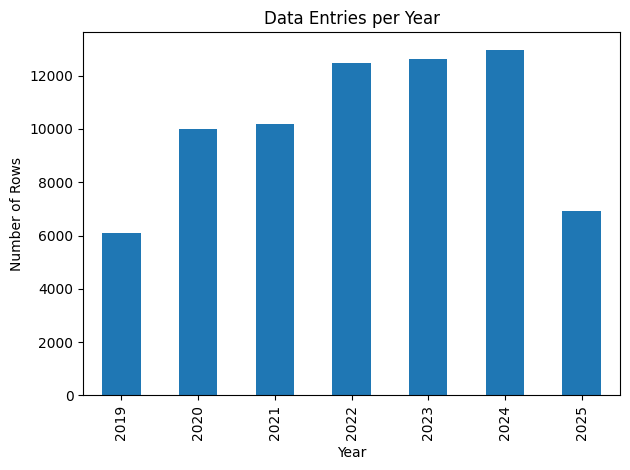

In [ ]:

year_counts.plot(kind='bar', title='Data Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Rows')
plt.tight_layout()
plt.show()


In [ ]:
data['year'].value_counts().sort_index()



year
2019     6090
2020    10015
2021    10168
2022    12478
2023    12637
2024    12974
2025     6921
Name: count, dtype: int64

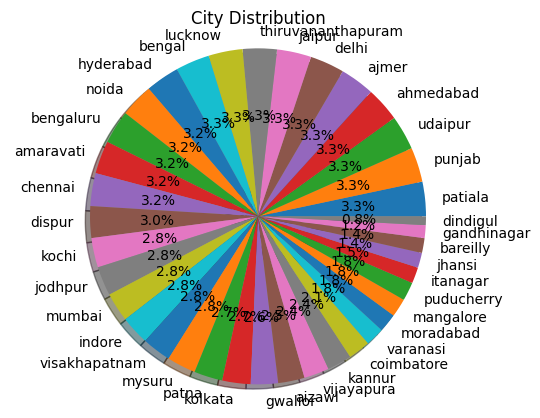

city
patiala               2369
punjab                2368
udaipur               2364
ahmedabad             2362
ajmer                 2360
delhi                 2357
jaipur                2348
thiruvananthapuram    2342
lucknow               2338
bengal                2336
hyderabad             2308
noida                 2294
bengaluru             2289
amaravati             2256
chennai               2253
dispur                2173
kochi                 2022
jodhpur               1999
mumbai                1990
indore                1987
visakhapatnam         1980
mysuru                1977
patna                 1953
kolkata               1942
gwalior               1866
aizawl                1813
vijayapura            1725
kannur                1678
coimbatore            1517
varanasi              1278
moradabad             1273
mangalore             1271
puducherry            1271
itanagar              1099
jhansi                1031
bareilly              1014
gandhinagar            

In [ ]:
city_counts = data['city'].value_counts()
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('City Distribution')
plt.axis('equal')  #
plt.show()
print(city_counts)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'thiruvananthapuram'),
  Text(1, 0, 'kolkata'),
  Text(2, 0, 'mumbai'),
  Text(3, 0, 'delhi'),
  Text(4, 0, 'chennai'),
  Text(5, 0, 'bengaluru'),
  Text(6, 0, 'lucknow'),
  Text(7, 0, 'jaipur'),
  Text(8, 0, 'hyderabad'),
  Text(9, 0, 'patna'),
  Text(10, 0, 'dispur'),
  Text(11, 0, 'amaravati'),
  Text(12, 0, 'itanagar'),
  Text(13, 0, 'bengal'),
  Text(14, 0, 'punjab'),
  Text(15, 0, 'indore'),
  Text(16, 0, 'udaipur'),
  Text(17, 0, 'ahmedabad'),
  Text(18, 0, 'dindigul'),
  Text(19, 0, 'coimbatore'),
  Text(20, 0, 'kochi'),
  Text(21, 0, 'mysuru'),
  Text(22, 0, 'kannur'),
  Text(23, 0, 'mangalore'),
  Text(24, 0, 'visakhapatnam'),
  Text(25, 0, 'varanasi'),
  Text(26, 0, 'patiala'),
  Text(27, 0, 'moradabad'),
  Text(28, 0, 'bareilly'),
  Text(29, 0, '

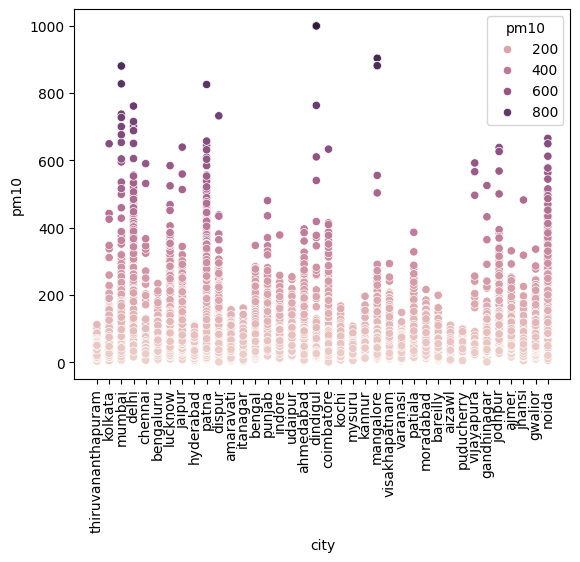

In [ ]:

  sns.scatterplot(x='city', y='pm10', data=data,hue='pm10')
  plt.xticks(rotation =90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'thiruvananthapuram'),
  Text(1, 0, 'kolkata'),
  Text(2, 0, 'mumbai'),
  Text(3, 0, 'delhi'),
  Text(4, 0, 'chennai'),
  Text(5, 0, 'bengaluru'),
  Text(6, 0, 'lucknow'),
  Text(7, 0, 'jaipur'),
  Text(8, 0, 'hyderabad'),
  Text(9, 0, 'patna'),
  Text(10, 0, 'dispur'),
  Text(11, 0, 'amaravati'),
  Text(12, 0, 'itanagar'),
  Text(13, 0, 'bengal'),
  Text(14, 0, 'punjab'),
  Text(15, 0, 'indore'),
  Text(16, 0, 'udaipur'),
  Text(17, 0, 'ahmedabad'),
  Text(18, 0, 'dindigul'),
  Text(19, 0, 'coimbatore'),
  Text(20, 0, 'kochi'),
  Text(21, 0, 'mysuru'),
  Text(22, 0, 'kannur'),
  Text(23, 0, 'mangalore'),
  Text(24, 0, 'visakhapatnam'),
  Text(25, 0, 'varanasi'),
  Text(26, 0, 'patiala'),
  Text(27, 0, 'moradabad'),
  Text(28, 0, 'bareilly'),
  Text(29, 0, '

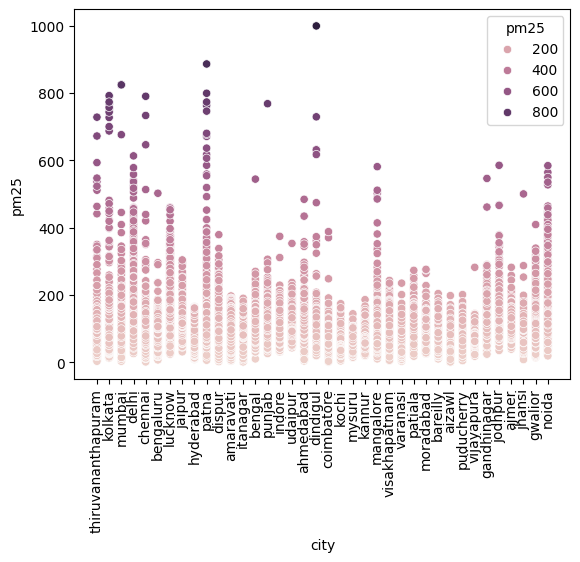

In [ ]:

  sns.scatterplot(x='city', y='pm25', data=data,hue='pm25')
  plt.xticks(rotation =90)

In [ ]:
#sns.pairplot(hue="city",data=data)


In [ ]:
for col in['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
   for city in data['city'].unique():
      med_val = data[data['city'] == city][col].median()
      data.loc[
          (data['city'] == city) & (data[col].isnull()),
          col
      ] = med_val

In [ ]:
data.isna().sum()

city     0
date     0
pm25     0
pm10     0
o3       0
no2      0
so2      0
co       0
day      0
month    0
year     0
dtype: int64

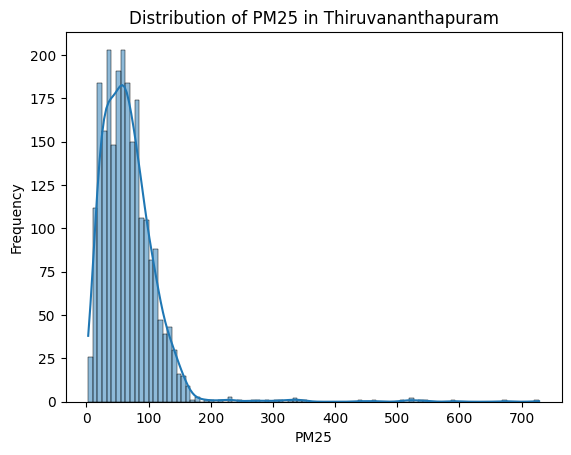

In [ ]:
sns.histplot(data= data[data["city"] == "thiruvananthapuram"], x="pm25", kde=True)
plt.title("Distribution of PM25 in Thiruvananthapuram")
plt.xlabel("PM25")
plt.ylabel("Frequency")
plt.show()

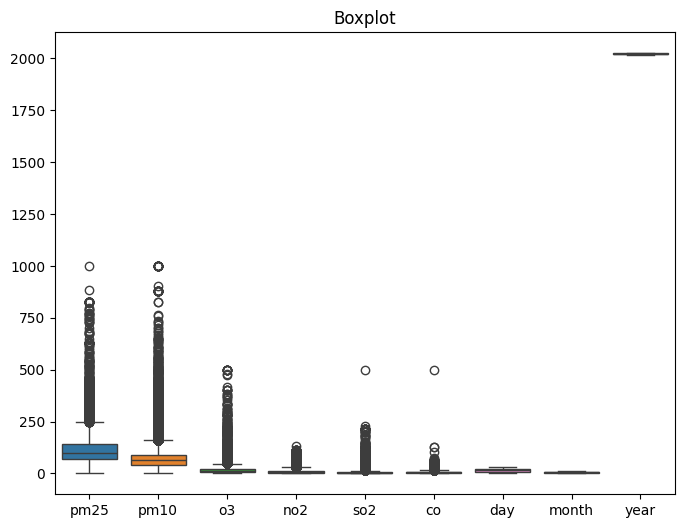

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data)
plt.title("Boxplot")
plt.show()

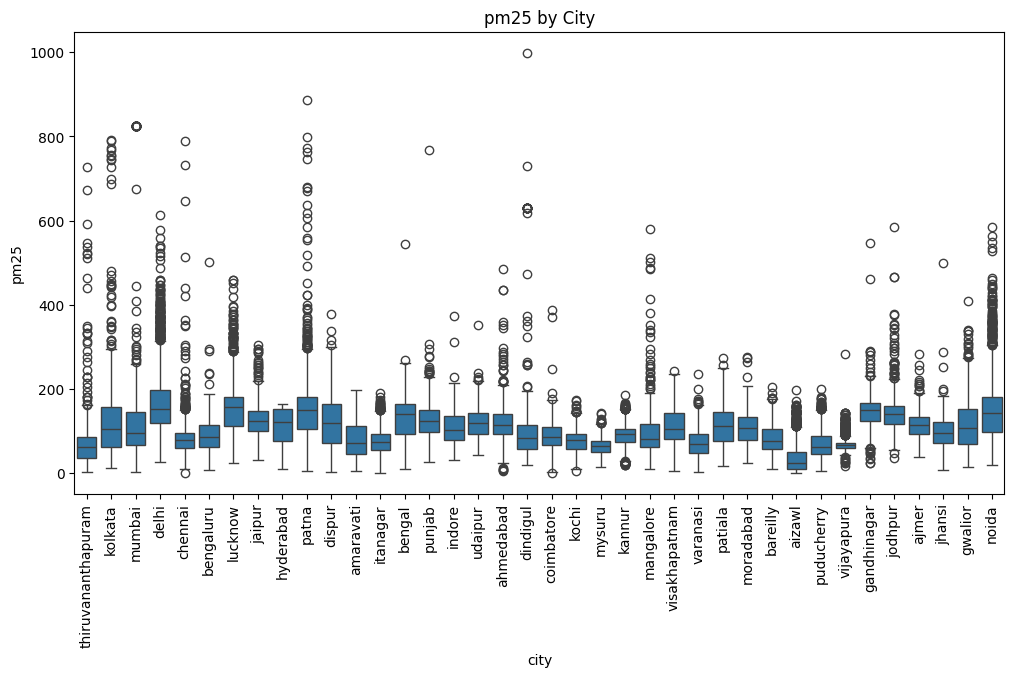

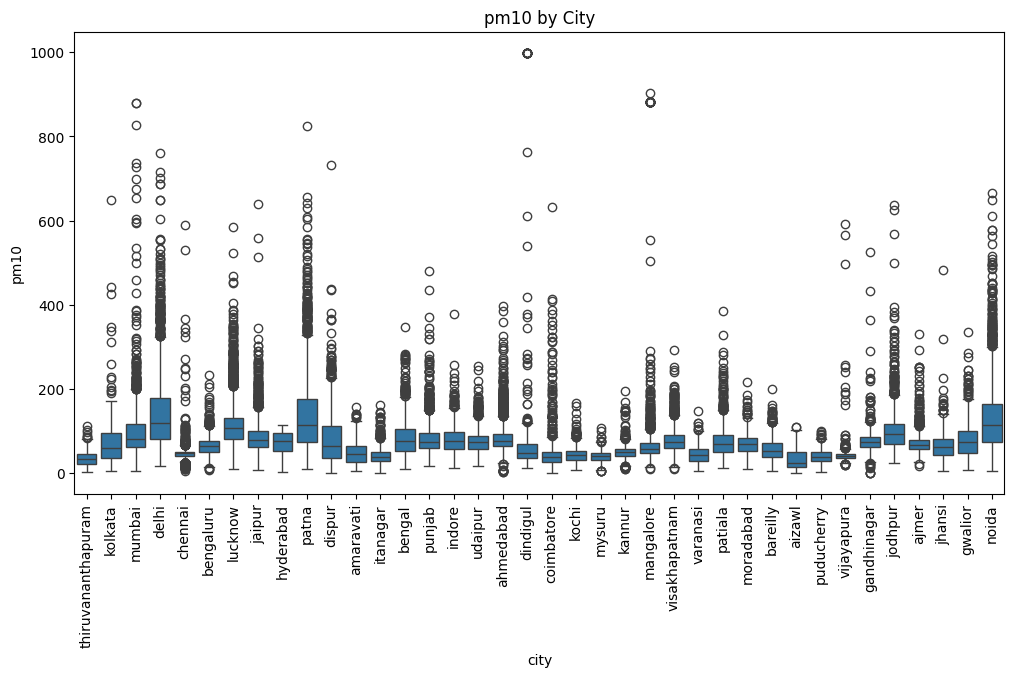

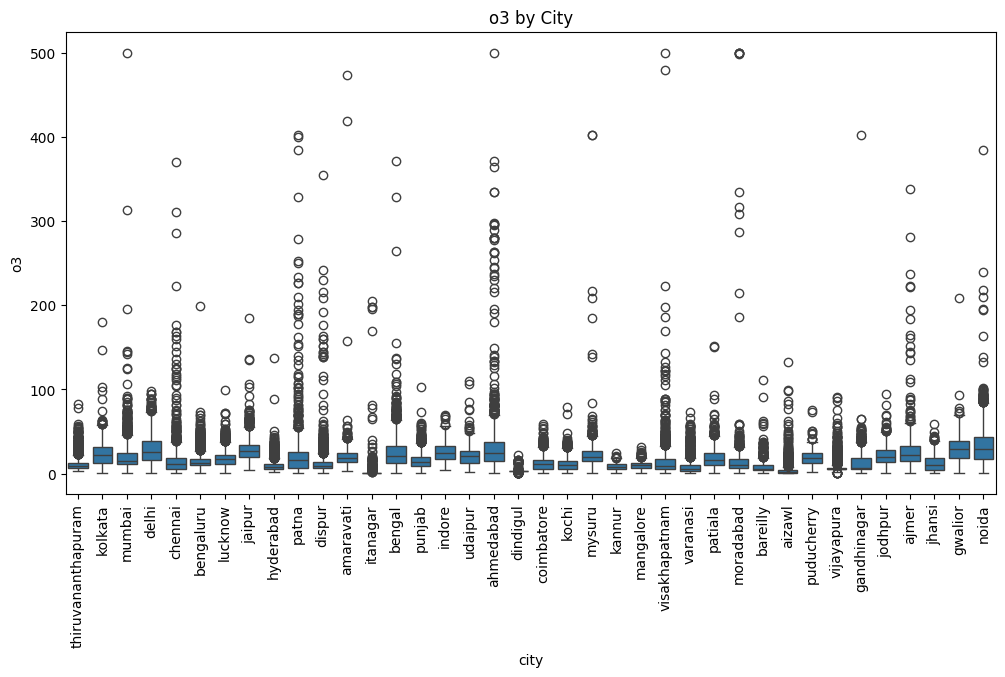

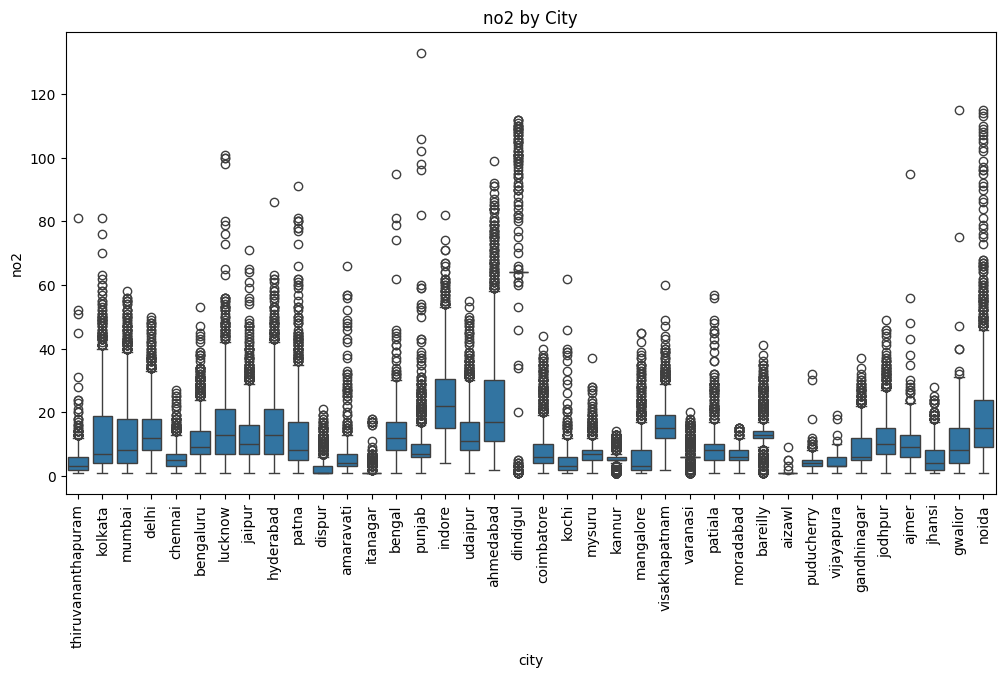

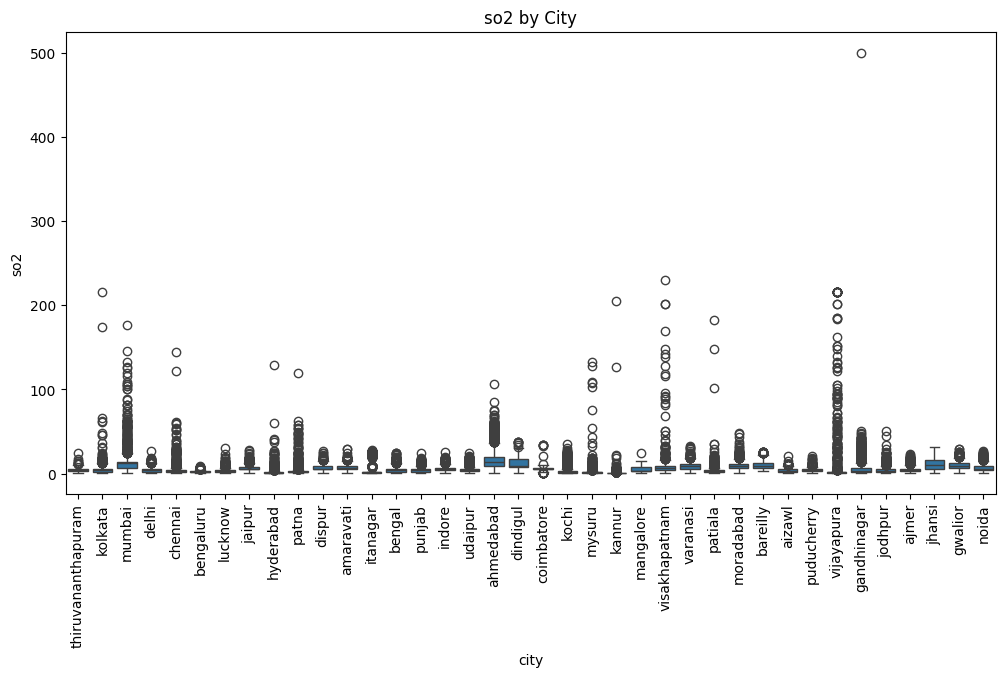

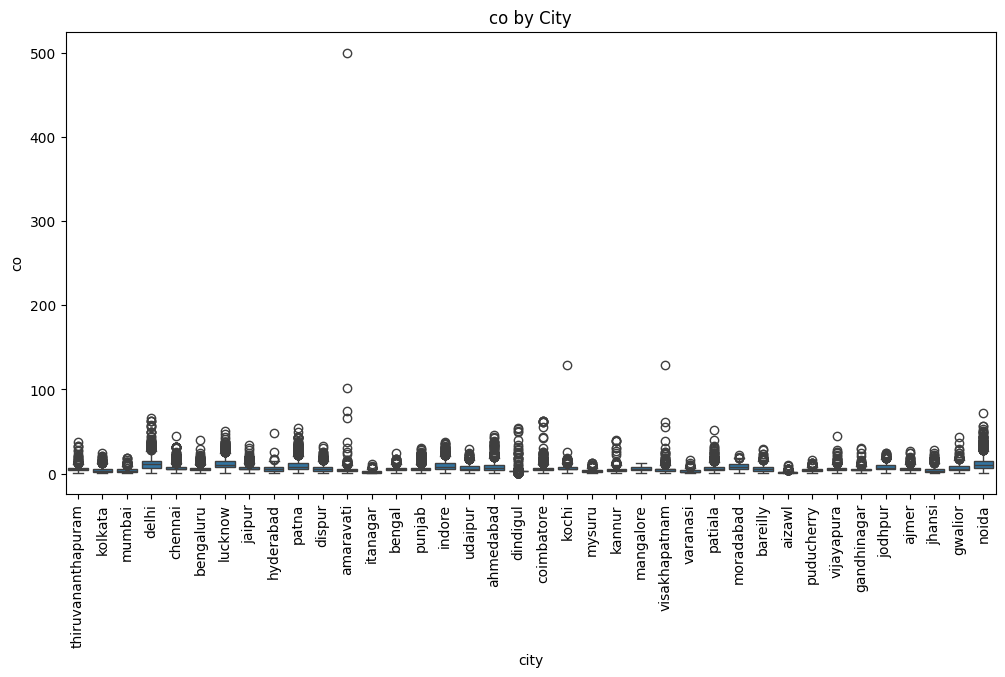

In [ ]:
cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
for col in cols:
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='city', y=col, data=data)
  plt.title(f"{col} by City")
  plt.xticks(rotation=90)
  plt.show()


In [ ]:


cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

for col in cols:
    for city in data['city'].unique():
        city_data = data[data['city'] == city][col]

        Q1 = city_data.quantile(0.25)
        Q3 = city_data.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        data.loc[data['city'] == city, col] = city_data.clip(lower_bound, upper_bound)


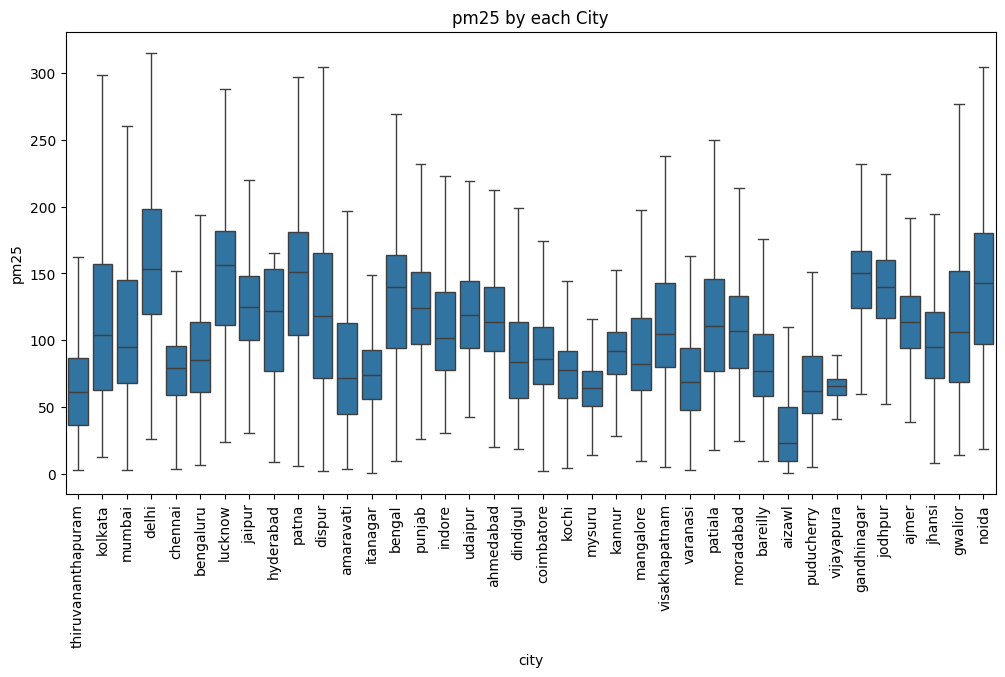

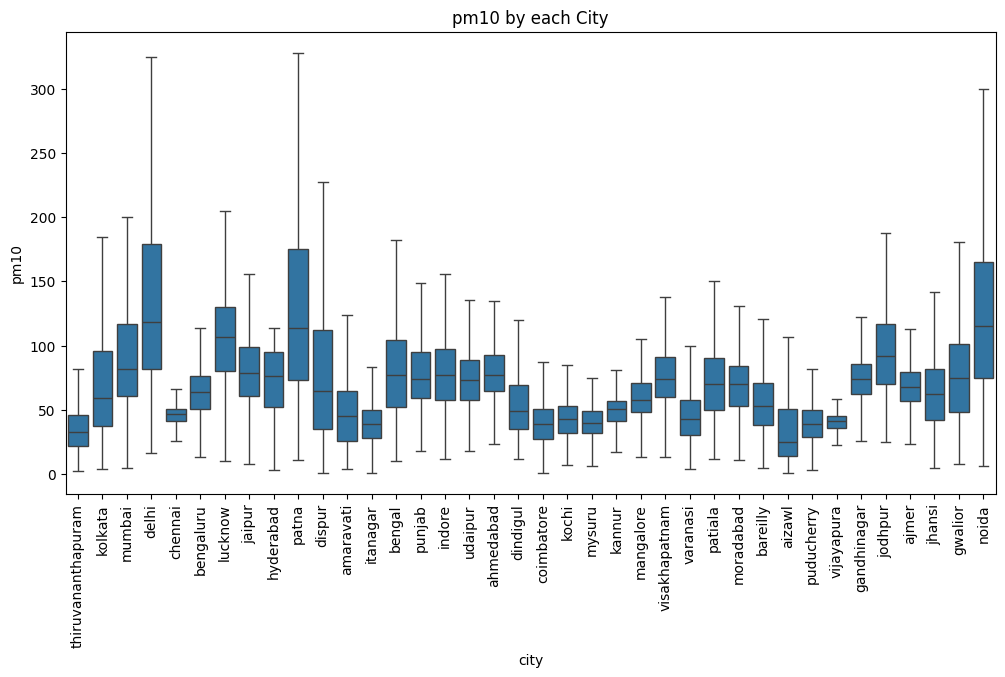

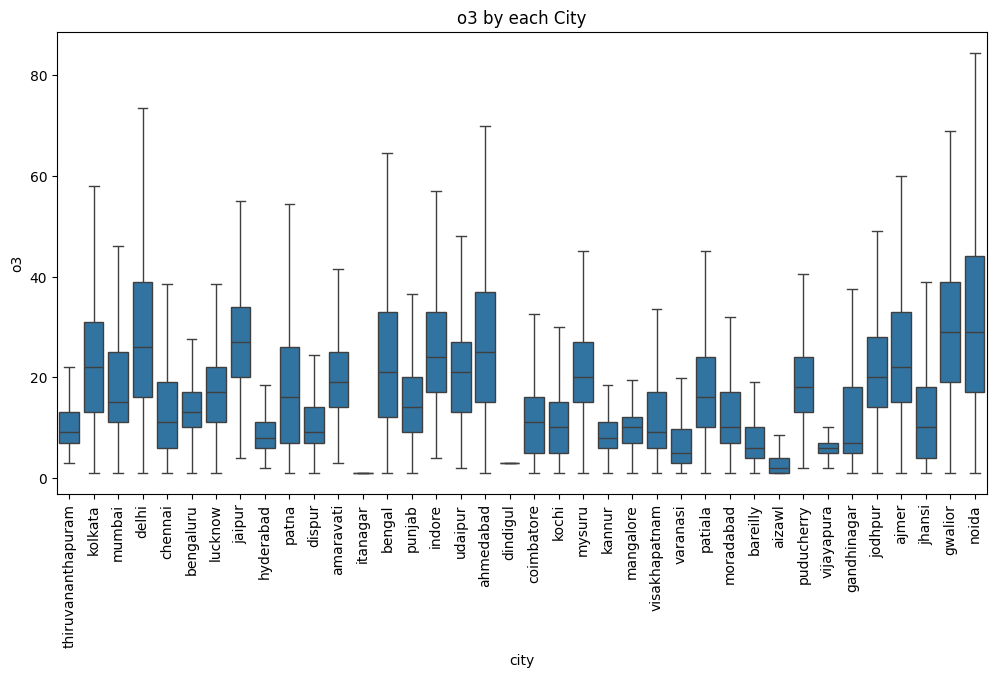

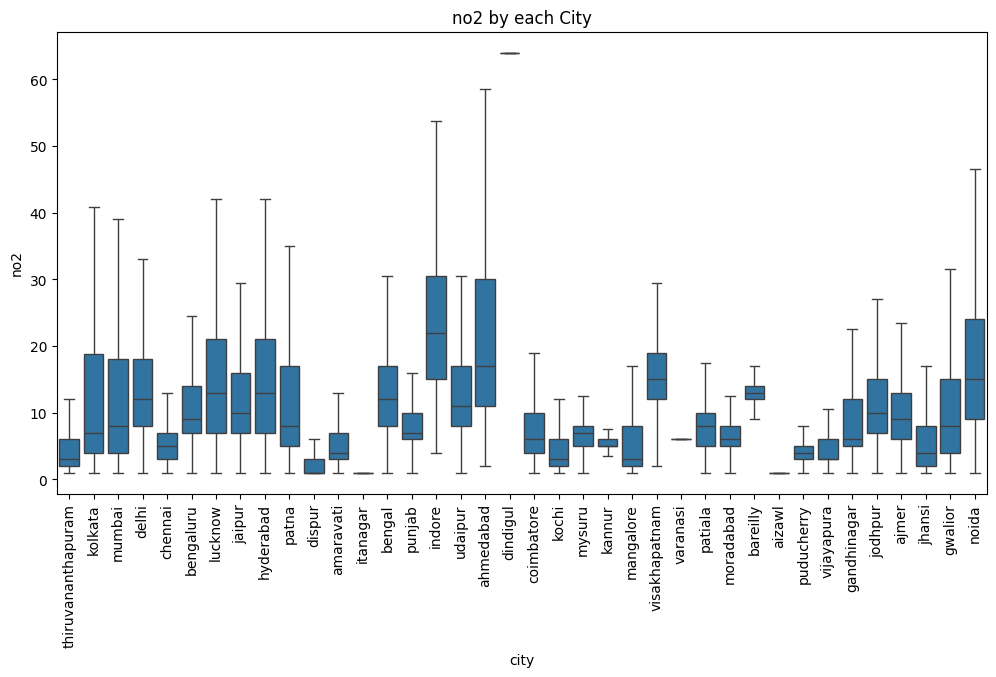

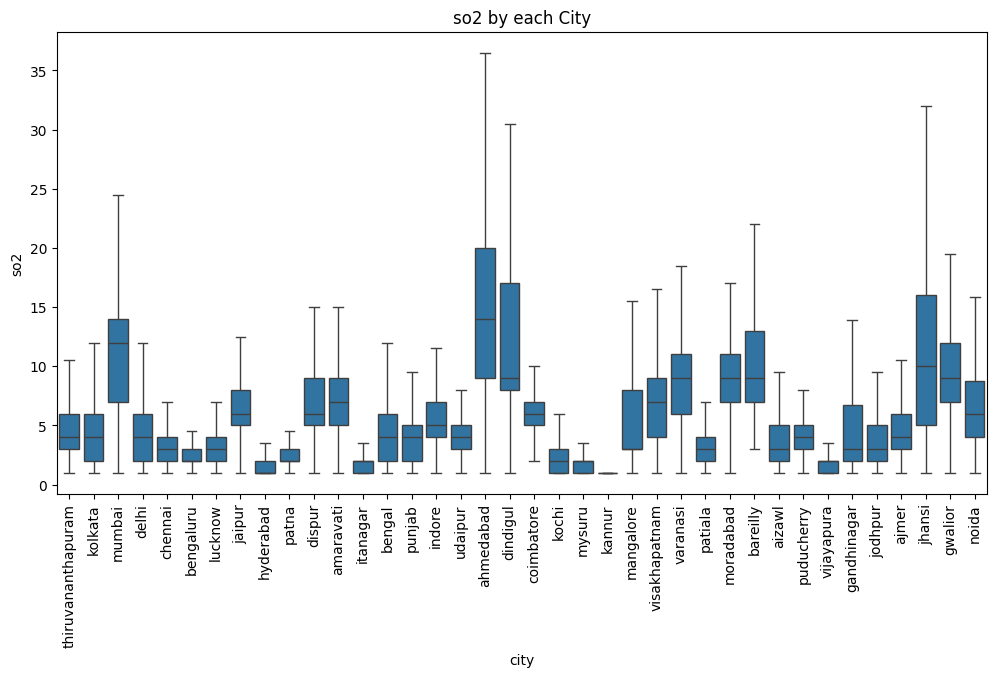

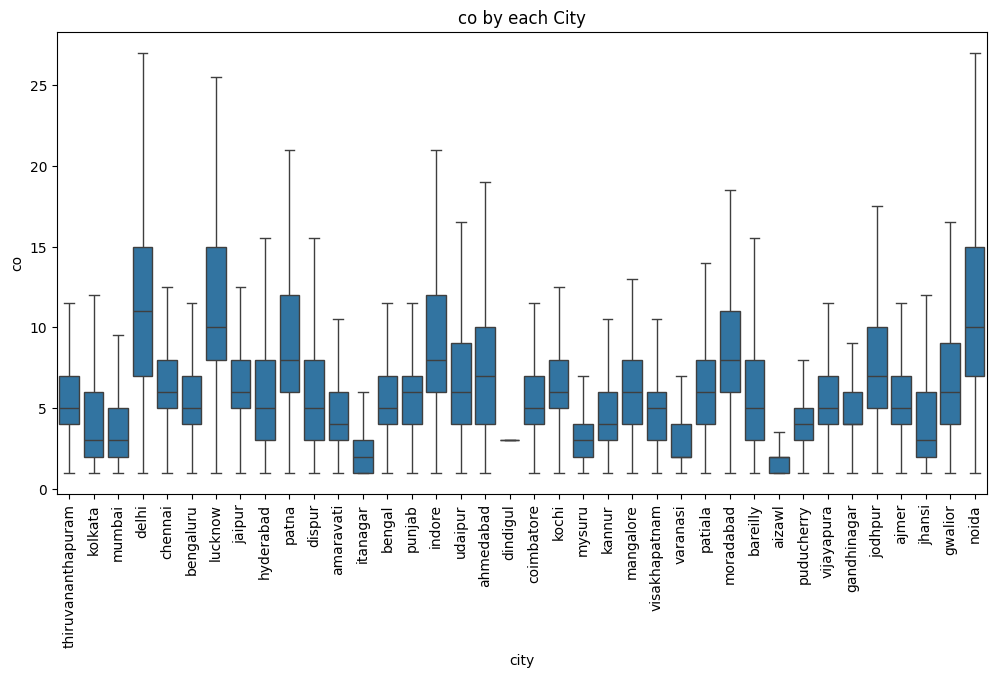

In [ ]:
cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']
for col in cols:
  plt.figure(figsize=(12, 6))
  sns.boxplot(x='city', y=col, data=data)
  plt.title(f"{col} by each City")
  plt.xticks(rotation=90)
  plt.show()


In [ ]:
data

city       date   pm25   pm10    o3   no2  so2    co  \
0      thiruvananthapuram 2025-01-06   48.0   24.0   6.0   5.0  5.0   2.0   
1      thiruvananthapuram 2025-02-06   45.0   23.0   6.0   5.0  6.0   2.0   
2      thiruvananthapuram 2025-03-06   44.0   22.0   6.0   6.0  6.0   3.0   
3      thiruvananthapuram 2025-04-06   44.0   33.0   6.0   6.0  6.0   2.0   
4      thiruvananthapuram 2025-05-06   63.0   44.0   6.0   5.0  6.0   2.0   
...                   ...        ...    ...    ...   ...   ...  ...   ...   
76214               noida 2020-02-04  143.0  118.0  16.0  27.0  6.0   9.0   
76215               noida 2020-03-12  143.0   86.0  30.0  11.0  4.0  21.0   
76216               noida 2019-11-17  143.0  118.0  13.0  46.5  7.0  11.0   
76217               noida 2019-12-10  143.0  249.0  28.0  46.5  7.0  20.0   
76218               noida 2019-09-13  143.0   49.0  14.0   7.0  6.0  10.0   

       day  month  year  
0        6      1  2025  
1        6      2  2025  
2        6      3  2025  
3        6      4  2025  
4        6      5  2025  
...    ...    ...   ...  
76214    4      2  2020  
76215   12      3  2020  
76216   17     11  2019  
76217   10     12  2019  
76218   13      9  2019  

[71283 rows x 11 columns]

In [ ]:
data.drop_duplicates(inplace=True)

/tmp/ipython-input-27-2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [ ]:
data

city       date   pm25   pm10    o3   no2  so2    co  \
0      thiruvananthapuram 2025-01-06   48.0   24.0   6.0   5.0  5.0   2.0   
1      thiruvananthapuram 2025-02-06   45.0   23.0   6.0   5.0  6.0   2.0   
2      thiruvananthapuram 2025-03-06   44.0   22.0   6.0   6.0  6.0   3.0   
3      thiruvananthapuram 2025-04-06   44.0   33.0   6.0   6.0  6.0   2.0   
4      thiruvananthapuram 2025-05-06   63.0   44.0   6.0   5.0  6.0   2.0   
...                   ...        ...    ...    ...   ...   ...  ...   ...   
76214               noida 2020-02-04  143.0  118.0  16.0  27.0  6.0   9.0   
76215               noida 2020-03-12  143.0   86.0  30.0  11.0  4.0  21.0   
76216               noida 2019-11-17  143.0  118.0  13.0  46.5  7.0  11.0   
76217               noida 2019-12-10  143.0  249.0  28.0  46.5  7.0  20.0   
76218               noida 2019-09-13  143.0   49.0  14.0   7.0  6.0  10.0   

       day  month  year  
0        6      1  2025  
1        6      2  2025  
2        6      3  2025  
3        6      4  2025  
4        6      5  2025  
...    ...    ...   ...  
76214    4      2  2020  
76215   12      3  2020  
76216   17     11  2019  
76217   10     12  2019  
76218   13      9  2019  

[71283 rows x 11 columns]

In [ ]:
breakpoints = {
    'pm25': [
        (0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200),
        (91, 120, 201, 300), (121, 250, 301, 400), (251, 350, 401, 500)
    ],
    'pm10': [
        (0, 50, 0, 50), (51, 100, 51, 100), (101, 250, 101, 200),
        (251, 350, 201, 300), (351, 430, 301, 400), (431, 500, 401, 500)
    ],
    'o3': [
        (0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200),
        (169, 208, 201, 300), (209, 748, 301, 400), (749, 1000, 401, 500)
    ],
    'no2': [
        (0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200),
        (181, 280, 201, 300), (281, 400, 301, 400), (401, 500, 401, 500)
    ],
    'so2': [
        (0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200),
        (381, 800, 201, 300), (801, 1600, 301, 400), (1601, 2000, 401, 500)
    ],
    'co': [
        (0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200),
        (10.1, 17, 201, 300), (17.1, 34, 301, 400), (34.1, 50, 401, 500)
    ]
}

def calc_subindex(pollutant, value):
    for bp_low, bp_high, index_low, index_high in breakpoints[pollutant]:
        if bp_low <= value <= bp_high:
            aqi= ((index_high - index_low) / (bp_high - bp_low)) * (value - bp_low) + index_low
            print("val",aqi)
            return aqi
    return None

aqi_values = []
aqi_pollutant = []
for i, row in data.iterrows():
    sub_indices = {}
    for pollutant in ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']:
        if pollutant in row and pd.notna(row[pollutant]):
            value = row[pollutant]
            print(f"{pollutant}: {value}")
            sub_index = calc_subindex(pollutant, value)
            if sub_index is not None:
                sub_indices[pollutant] = round(sub_index)
    aqi = max(sub_indices.values()) if sub_indices else None
    aqi_gas = max(sub_indices, key=sub_indices.get) if sub_indices else None
    print(f"{max(sub_indices.values()) if sub_indices else None}: {aqi}")
    aqi_values.append(aqi)
    aqi_pollutant.append(aqi_gas)


data["aqi"] = aqi_values
data["pollutant"] = aqi_pollutant

#data["AQI"] = data.apply(calculate_aqi, axis=1)


print("✅ AQI calculated and saved to aqi_output.csv")

Streaming output truncated to the last 5000 lines.
no2: 46.5
val 57.91025641025641
so2: 10.0
val 12.5
co: 27.0
val 358.9940828402367
359: 359
pm25: 178.0
val 344.74418604651163
pm10: 198.0
val 165.4496644295302
o3: 48.0
val 48.0
no2: 46.5
val 57.91025641025641
so2: 9.0
val 11.25
co: 27.0
val 358.9940828402367
359: 359
pm25: 223.0
val 379.27906976744185
pm10: 146.0
val 130.8993288590604
o3: 8.0
val 8.0
no2: 46.5
val 57.91025641025641
so2: 7.0
val 8.75
co: 20.0
val 317.98816568047334
379: 379
pm25: 166.0
val 335.5348837209302
pm10: 129.0
val 119.60402684563758
o3: 41.0
val 41.0
no2: 46.5
val 57.91025641025641
so2: 4.0
val 5.0
co: 10.0
val 200.0
336: 336
pm25: 178.0
val 344.74418604651163
pm10: 167.0
val 144.8523489932886
o3: 61.0
val 61.0
no2: 46.5
val 57.91025641025641
so2: 5.0
val 6.25
co: 20.0
val 317.98816568047334
345: 345
pm25: 213.0
val 371.6046511627907
pm10: 300.0
val 250.0
o3: 70.0
val 70.0
no2: 46.5
val 57.91025641025641
so2: 8.0
val 10.0
co: 13.0
val 242.6086956521739
372: 37

/tmp/ipython-input-29-1475563858.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["aqi"] = aqi_values
/tmp/ipython-input-29-1475563858.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["pollutant"] = aqi_pollutant


In [ ]:
data

city       date   pm25   pm10    o3   no2  so2    co  \
0      thiruvananthapuram 2025-01-06   48.0   24.0   6.0   5.0  5.0   2.0   
1      thiruvananthapuram 2025-02-06   45.0   23.0   6.0   5.0  6.0   2.0   
2      thiruvananthapuram 2025-03-06   44.0   22.0   6.0   6.0  6.0   3.0   
3      thiruvananthapuram 2025-04-06   44.0   33.0   6.0   6.0  6.0   2.0   
4      thiruvananthapuram 2025-05-06   63.0   44.0   6.0   5.0  6.0   2.0   
...                   ...        ...    ...    ...   ...   ...  ...   ...   
76214               noida 2020-02-04  143.0  118.0  16.0  27.0  6.0   9.0   
76215               noida 2020-03-12  143.0   86.0  30.0  11.0  4.0  21.0   
76216               noida 2019-11-17  143.0  118.0  13.0  46.5  7.0  11.0   
76217               noida 2019-12-10  143.0  249.0  28.0  46.5  7.0  20.0   
76218               noida 2019-09-13  143.0   49.0  14.0   7.0  6.0  10.0   

       day  month  year  aqi pollutant  
0        6      1  2025  100        co  
1        6      2  2025  100        co  
2        6      3  2025  112        co  
3        6      4  2025  100        co  
4        6      5  2025  108      pm25  
...    ...    ...   ...  ...       ...  
76214    4      2  2020  318      pm25  
76215   12      3  2020  324        co  
76216   17     11  2019  318      pm25  
76217   10     12  2019  318      pm25  
76218   13      9  2019  318      pm25  

[71283 rows x 13 columns]

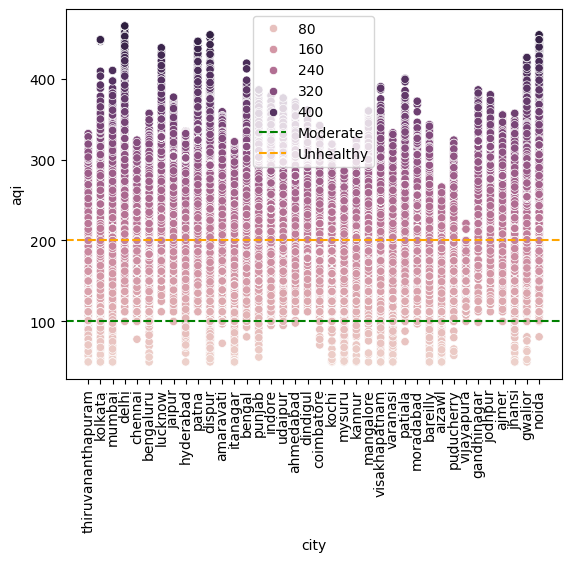

In [ ]:
sns.scatterplot(x='city', y='aqi', data=data,hue='aqi')
plt.xticks(rotation =90)
plt.axhline(100, color='green', linestyle='--', label='Moderate')
plt.axhline(200, color='orange', linestyle='--', label='Unhealthy')
plt.legend()

In [ ]:
"""plt.plot(data['city'== 'thiruvananthapuram'],data['aqi'],"g,--",marker='o')
plt.xticks(ticks= range(1, 25,1),rotation =45)
plt.title("Model Accuracy vs K Value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.grid()
plt.show()"""

'plt.plot(data[\'city\'== \'thiruvananthapuram\'],data[\'aqi\'],"g,--",marker=\'o\')\nplt.xticks(ticks= range(1, 25,1),rotation =45)\nplt.title("Model Accuracy vs K Value")\nplt.xlabel("K value")\nplt.ylabel("Accuracy")\nplt.grid()\nplt.show()'

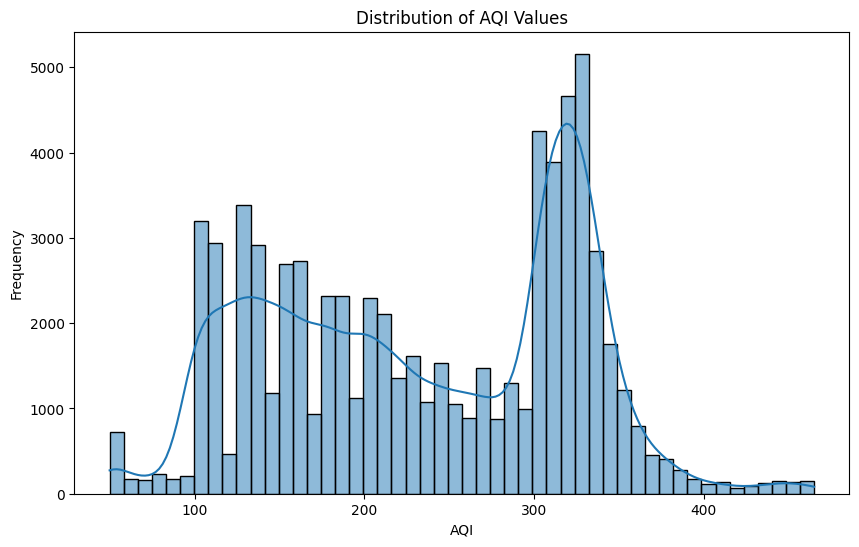

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['aqi'], bins=50, kde=True)
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

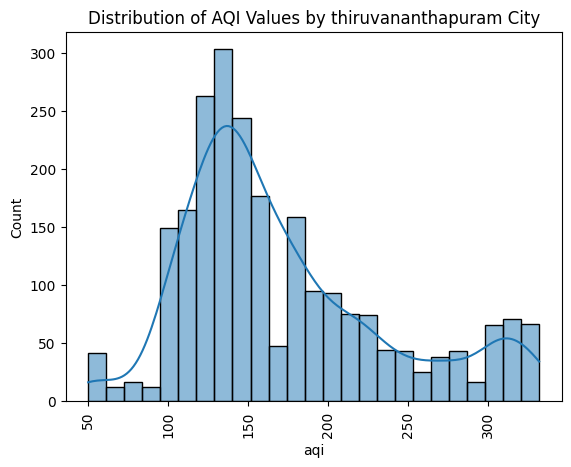

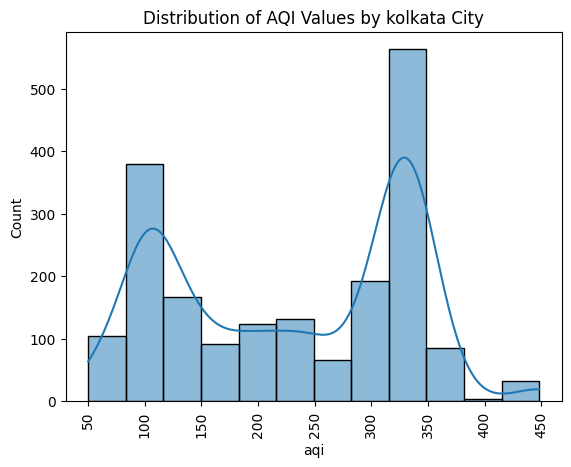

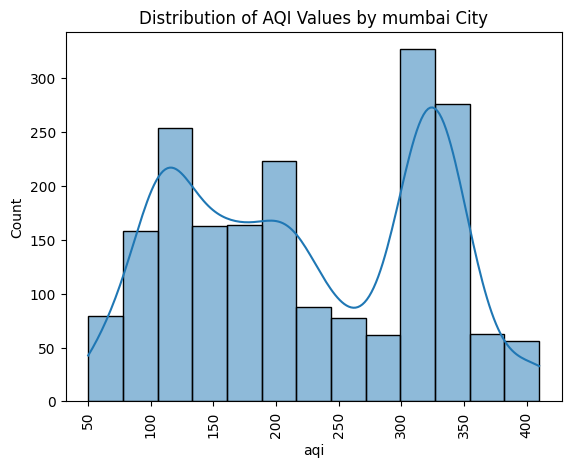

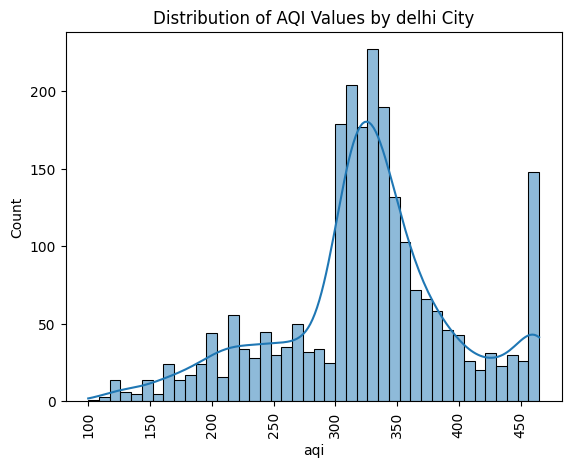

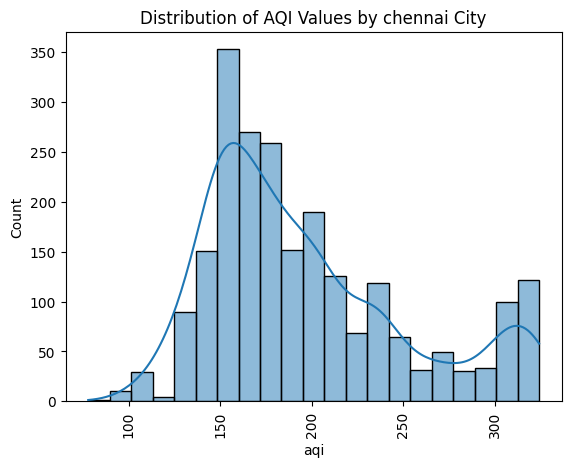

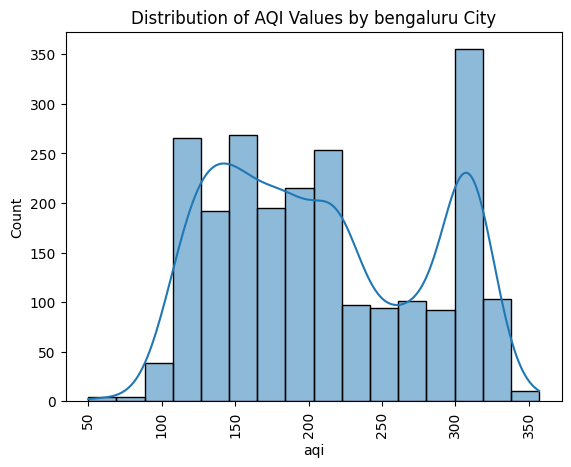

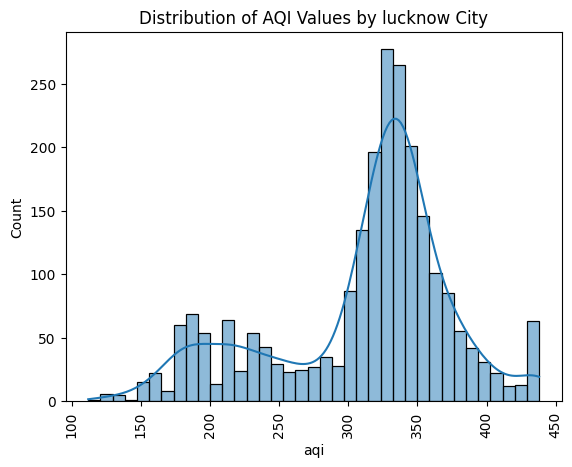

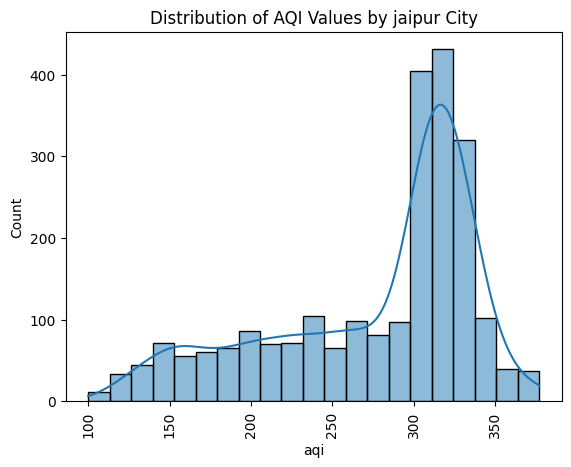

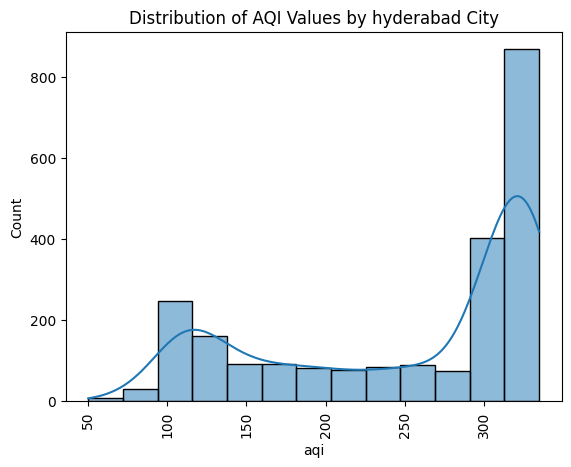

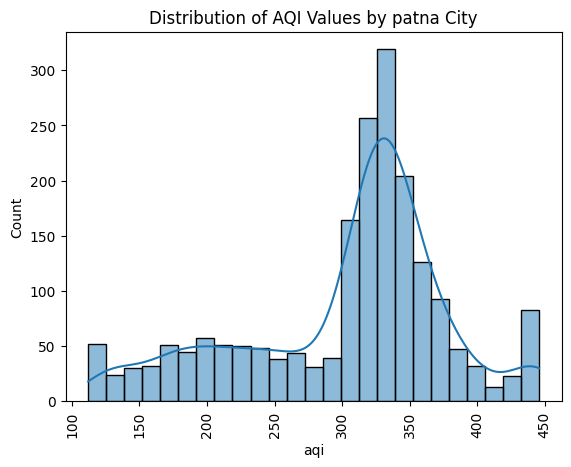

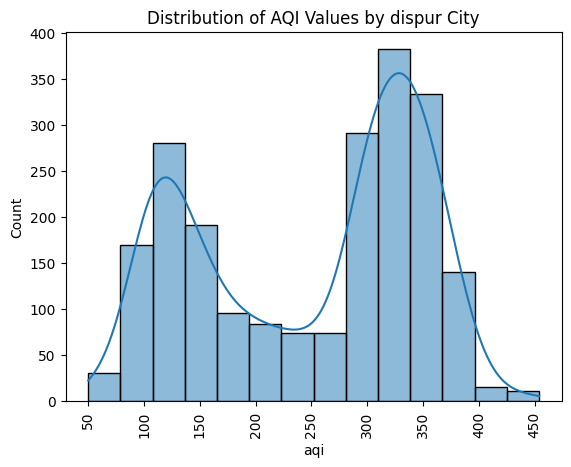

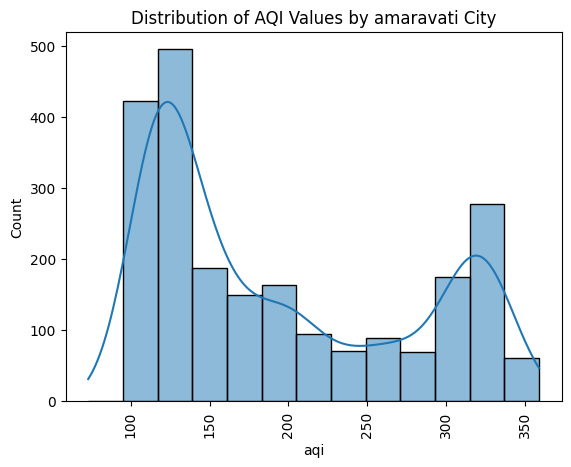

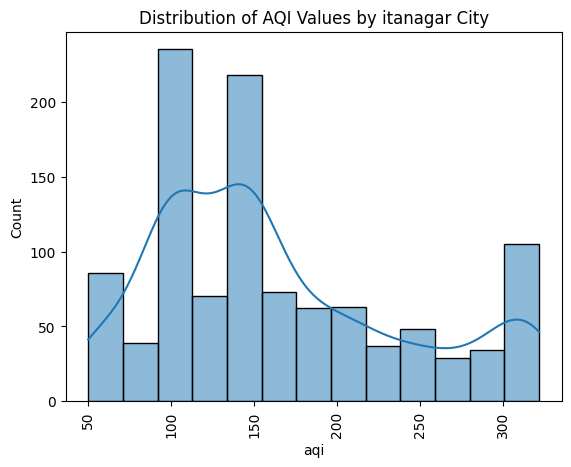

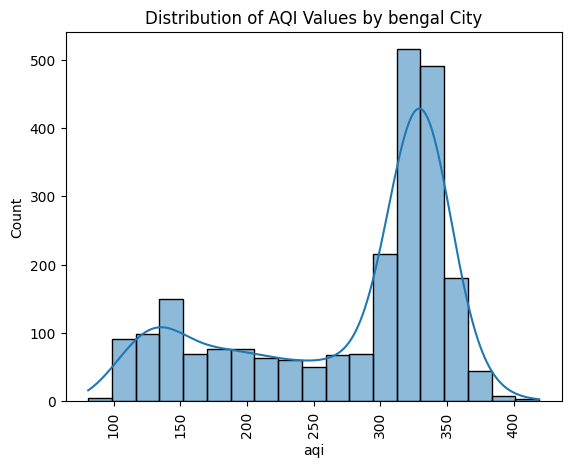

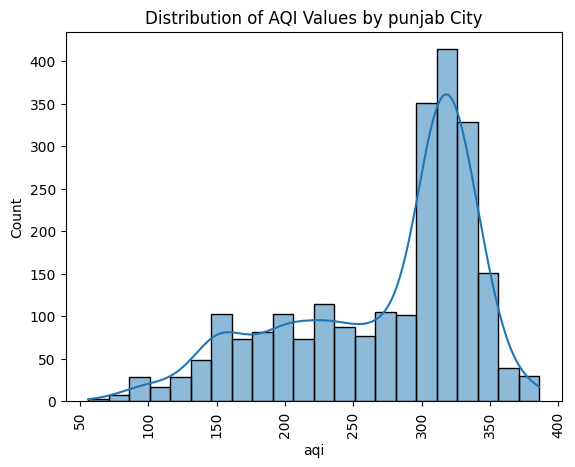

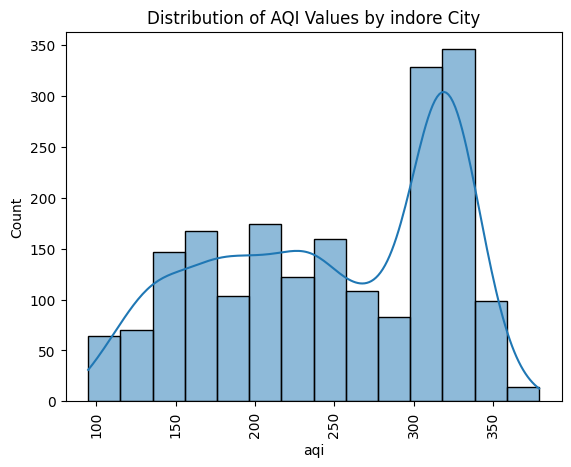

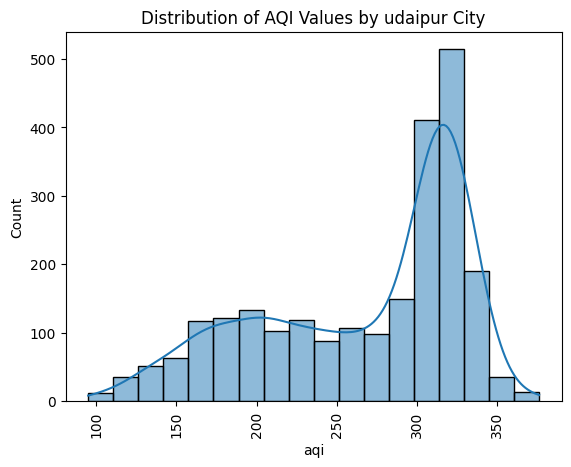

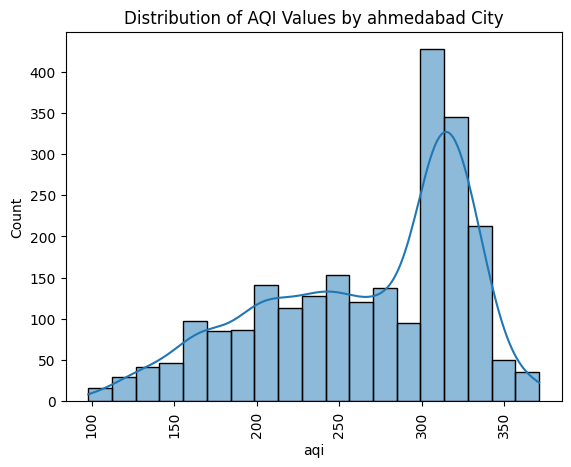

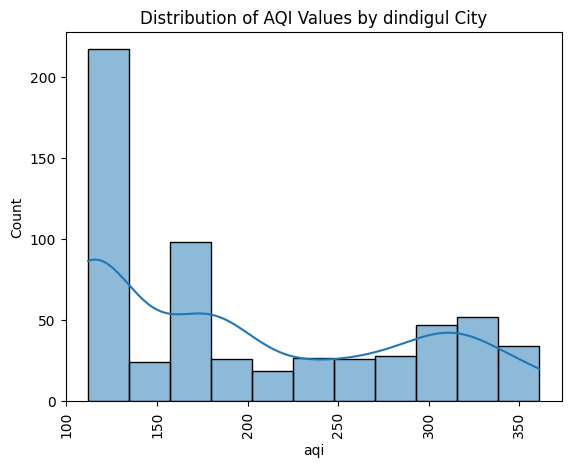

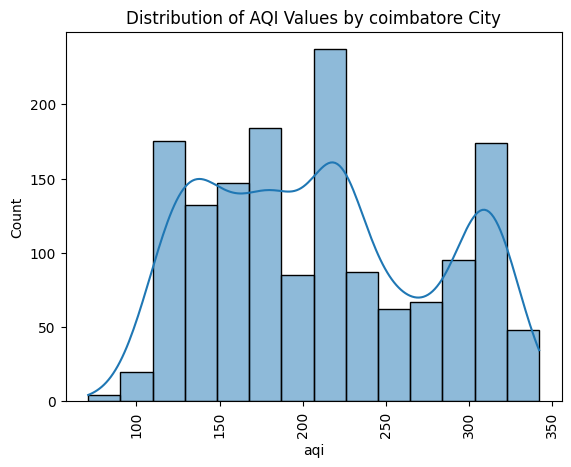

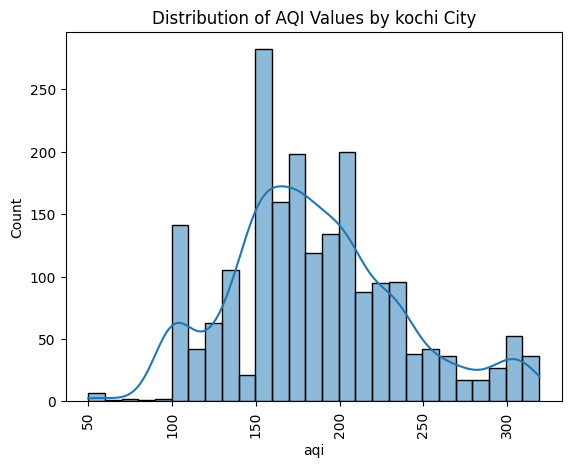

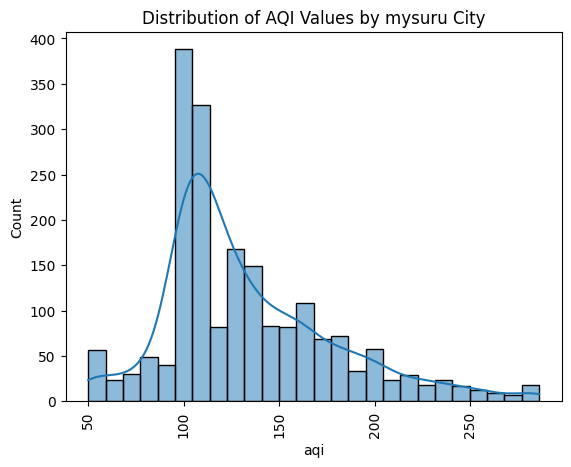

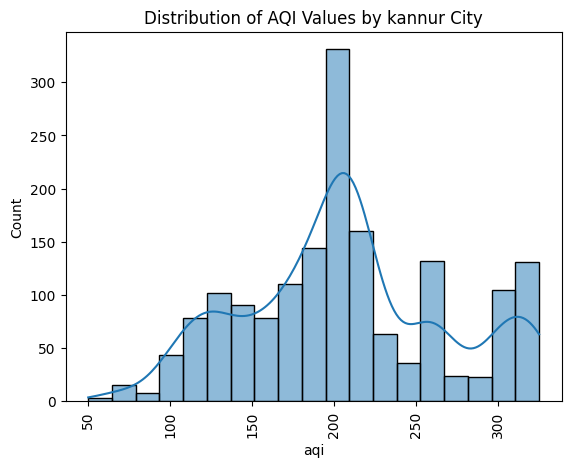

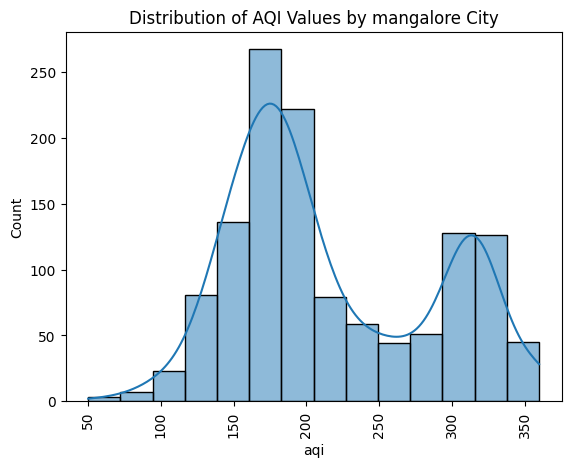

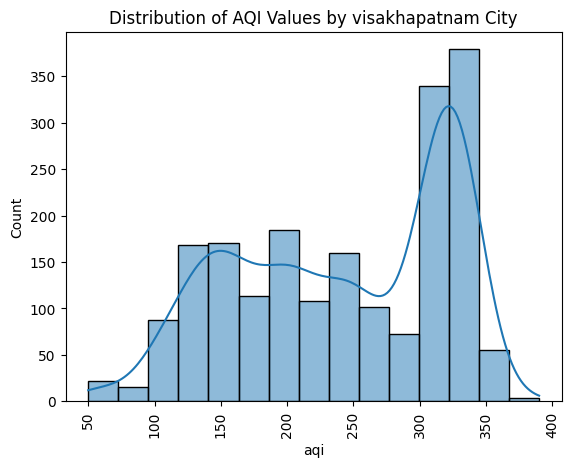

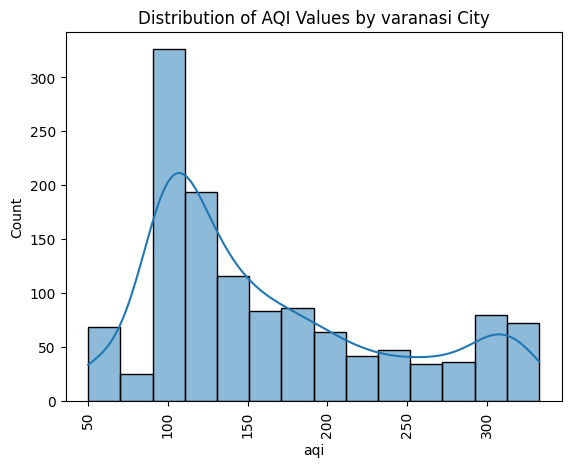

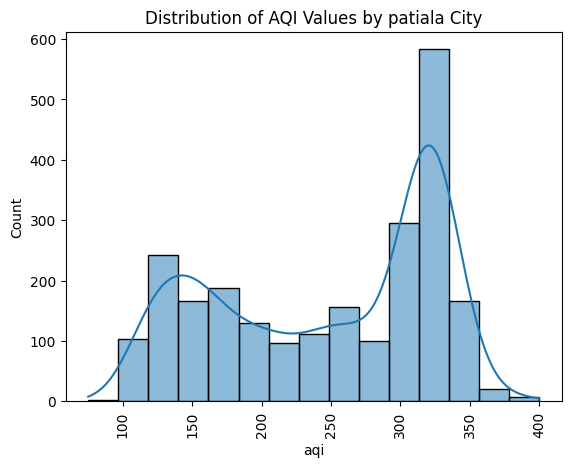

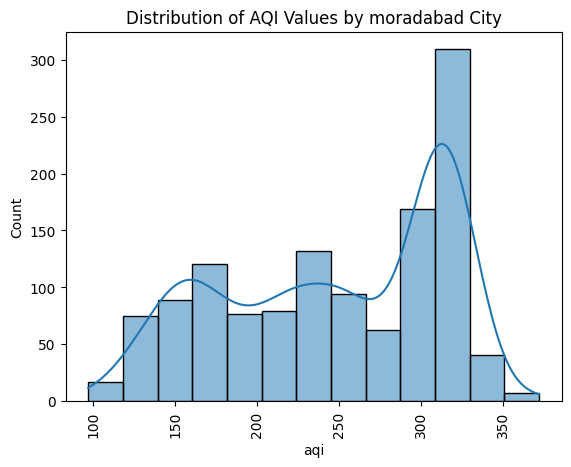

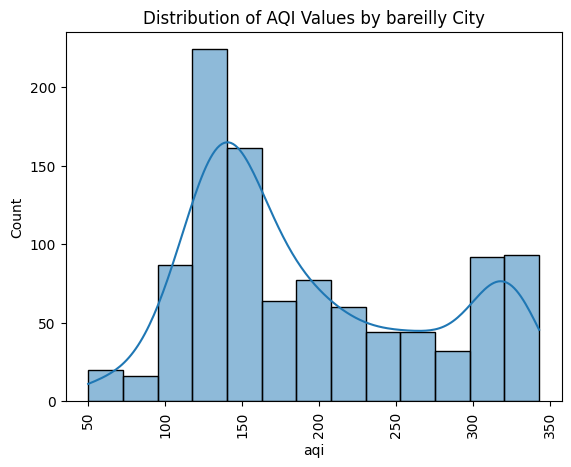

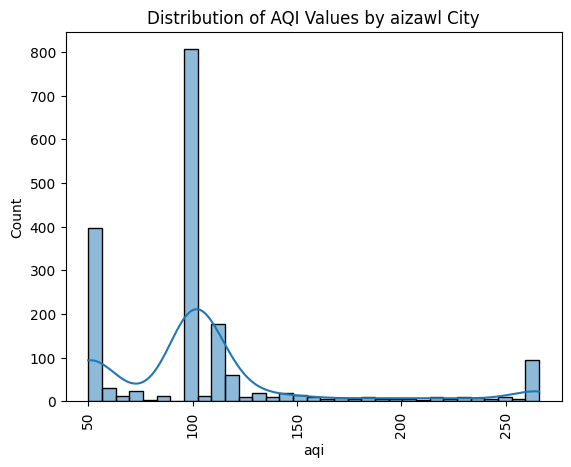

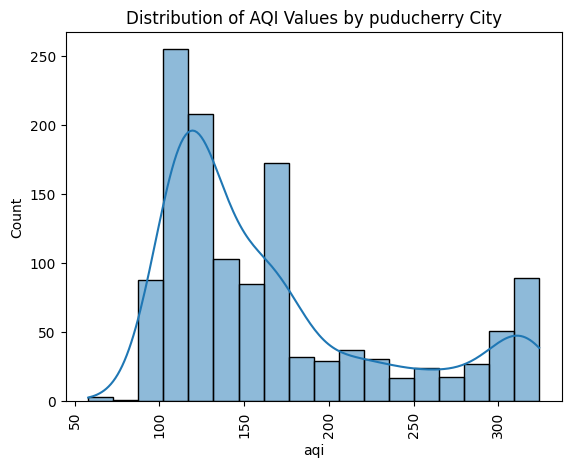

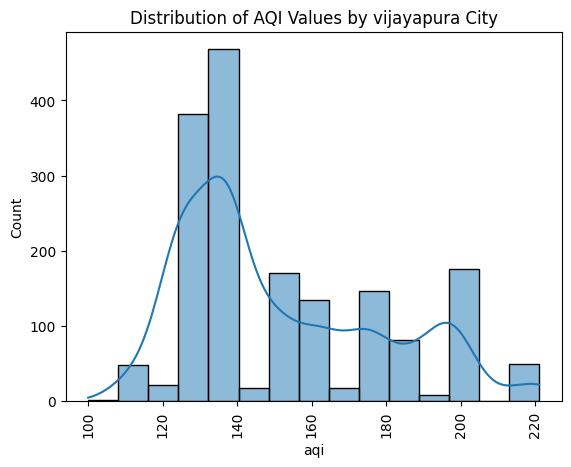

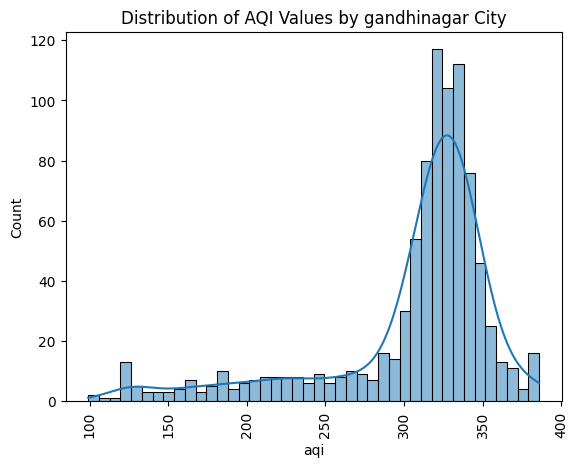

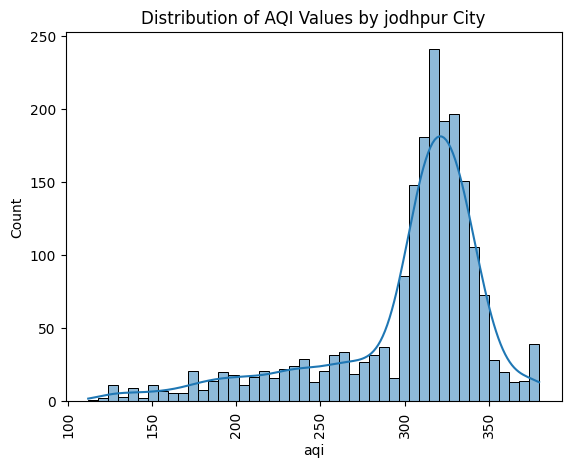

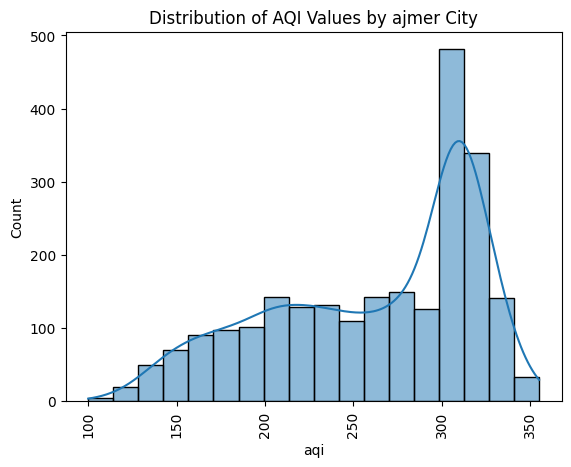

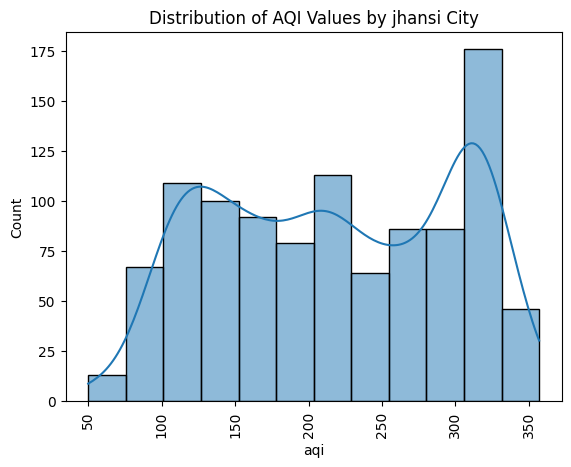

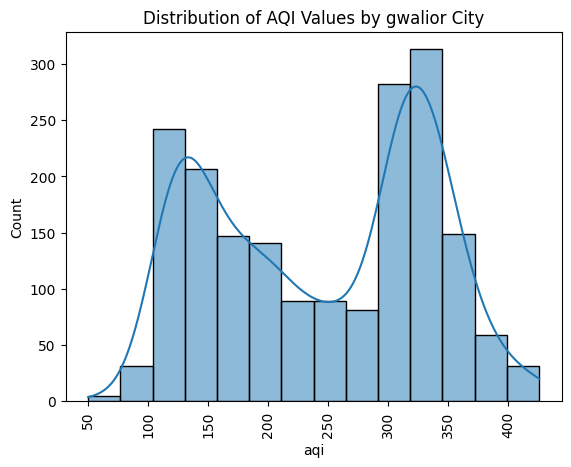

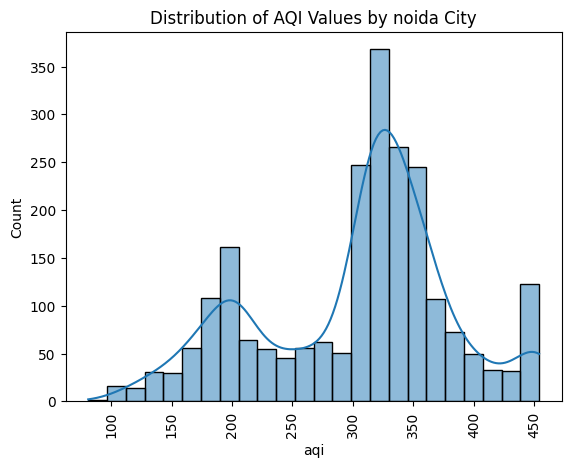

In [ ]:
cols =data['city'].unique()
for col in cols:

  sns.histplot(x='aqi', data=data[data['city'] == col] ,kde=True)
  plt.title(f"Distribution of AQI Values by {col} City")
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
def get_aqi_category(aqi):
    if pd.isna(aqi):
        return np.nan
    elif aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Moderate'
    elif aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi <= 200:
        return 'Unhealthy'
    elif aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'


In [ ]:
data

city       date   pm25   pm10    o3   no2  so2    co  \
0      thiruvananthapuram 2025-01-06   48.0   24.0   6.0   5.0  5.0   2.0   
1      thiruvananthapuram 2025-02-06   45.0   23.0   6.0   5.0  6.0   2.0   
2      thiruvananthapuram 2025-03-06   44.0   22.0   6.0   6.0  6.0   3.0   
3      thiruvananthapuram 2025-04-06   44.0   33.0   6.0   6.0  6.0   2.0   
4      thiruvananthapuram 2025-05-06   63.0   44.0   6.0   5.0  6.0   2.0   
...                   ...        ...    ...    ...   ...   ...  ...   ...   
76214               noida 2020-02-04  143.0  118.0  16.0  27.0  6.0   9.0   
76215               noida 2020-03-12  143.0   86.0  30.0  11.0  4.0  21.0   
76216               noida 2019-11-17  143.0  118.0  13.0  46.5  7.0  11.0   
76217               noida 2019-12-10  143.0  249.0  28.0  46.5  7.0  20.0   
76218               noida 2019-09-13  143.0   49.0  14.0   7.0  6.0  10.0   

       day  month  year  aqi pollutant  
0        6      1  2025  100        co  
1        6      2  2025  100        co  
2        6      3  2025  112        co  
3        6      4  2025  100        co  
4        6      5  2025  108      pm25  
...    ...    ...   ...  ...       ...  
76214    4      2  2020  318      pm25  
76215   12      3  2020  324        co  
76216   17     11  2019  318      pm25  
76217   10     12  2019  318      pm25  
76218   13      9  2019  318      pm25  

[71283 rows x 13 columns]

In [ ]:
#data["aqi_category"].value_counts()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71283 entries, 0 to 76218
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   city       71283 non-null  object        
 1   date       71283 non-null  datetime64[ns]
 2   pm25       71283 non-null  float64       
 3   pm10       71283 non-null  float64       
 4   o3         71283 non-null  float64       
 5   no2        71283 non-null  float64       
 6   so2        71283 non-null  float64       
 7   co         71283 non-null  float64       
 8   day        71283 non-null  int32         
 9   month      71283 non-null  int32         
 10  year       71283 non-null  int32         
 11  aqi        71283 non-null  int64         
 12  pollutant  71283 non-null  object        
dtypes: datetime64[ns](1), float64(6), int32(3), int64(1), object(2)
memory usage: 6.8+ MB


In [ ]:
data

city       date   pm25   pm10    o3   no2  so2    co  \
0      thiruvananthapuram 2025-01-06   48.0   24.0   6.0   5.0  5.0   2.0   
1      thiruvananthapuram 2025-02-06   45.0   23.0   6.0   5.0  6.0   2.0   
2      thiruvananthapuram 2025-03-06   44.0   22.0   6.0   6.0  6.0   3.0   
3      thiruvananthapuram 2025-04-06   44.0   33.0   6.0   6.0  6.0   2.0   
4      thiruvananthapuram 2025-05-06   63.0   44.0   6.0   5.0  6.0   2.0   
...                   ...        ...    ...    ...   ...   ...  ...   ...   
76214               noida 2020-02-04  143.0  118.0  16.0  27.0  6.0   9.0   
76215               noida 2020-03-12  143.0   86.0  30.0  11.0  4.0  21.0   
76216               noida 2019-11-17  143.0  118.0  13.0  46.5  7.0  11.0   
76217               noida 2019-12-10  143.0  249.0  28.0  46.5  7.0  20.0   
76218               noida 2019-09-13  143.0   49.0  14.0   7.0  6.0  10.0   

       day  month  year  aqi pollutant  
0        6      1  2025  100        co  
1        6      2  2025  100        co  
2        6      3  2025  112        co  
3        6      4  2025  100        co  
4        6      5  2025  108      pm25  
...    ...    ...   ...  ...       ...  
76214    4      2  2020  318      pm25  
76215   12      3  2020  324        co  
76216   17     11  2019  318      pm25  
76217   10     12  2019  318      pm25  
76218   13      9  2019  318      pm25  

[71283 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler

scale_cols = ['pm25', 'pm10', 'o3', 'no2', 'so2', 'co', 'day', 'month', 'year']
sd = StandardScaler()
data_sc = data.copy()
data_sc[scale_cols] = sd.fit_transform(data[scale_cols])


In [ ]:
#x['city'] = LabelEncoder().fit_transform(x['city'])

In [ ]:
from prophet import Prophet

In [ ]:
data

city       date   pm25   pm10    o3   no2  so2    co  \
0      thiruvananthapuram 2025-01-06   48.0   24.0   6.0   5.0  5.0   2.0   
1      thiruvananthapuram 2025-02-06   45.0   23.0   6.0   5.0  6.0   2.0   
2      thiruvananthapuram 2025-03-06   44.0   22.0   6.0   6.0  6.0   3.0   
3      thiruvananthapuram 2025-04-06   44.0   33.0   6.0   6.0  6.0   2.0   
4      thiruvananthapuram 2025-05-06   63.0   44.0   6.0   5.0  6.0   2.0   
...                   ...        ...    ...    ...   ...   ...  ...   ...   
76214               noida 2020-02-04  143.0  118.0  16.0  27.0  6.0   9.0   
76215               noida 2020-03-12  143.0   86.0  30.0  11.0  4.0  21.0   
76216               noida 2019-11-17  143.0  118.0  13.0  46.5  7.0  11.0   
76217               noida 2019-12-10  143.0  249.0  28.0  46.5  7.0  20.0   
76218               noida 2019-09-13  143.0   49.0  14.0   7.0  6.0  10.0   

       day  month  year  aqi pollutant  
0        6      1  2025  100        co  
1        6      2  2025  100        co  
2        6      3  2025  112        co  
3        6      4  2025  100        co  
4        6      5  2025  108      pm25  
...    ...    ...   ...  ...       ...  
76214    4      2  2020  318      pm25  
76215   12      3  2020  324        co  
76216   17     11  2019  318      pm25  
76217   10     12  2019  318      pm25  
76218   13      9  2019  318      pm25  

[71283 rows x 13 columns]

In [ ]:
df_city = data[data['city'] == 'delhi'][['date', 'aqi']].copy()
df_city = df_city.rename(columns={'date': 'ds', 'aqi': 'y'})
df_city

ds    y
6685 2025-01-06  359
6686 2025-02-06  280
6687 2025-03-06  302
6688 2025-04-06  319
6689 2025-05-06  325
...         ...  ...
9374 2020-04-19  326
9375 2020-04-21  326
9376 2019-12-31  326
9377 2019-07-07  326
9378 2019-09-06  326

[2357 rows x 2 columns]

In [ ]:
df_city = df_city.set_index('ds').asfreq('D')
df_city['y'] = df_city['y'].interpolate()
df_city = df_city.reset_index()
df_city

ds      y
0    2019-01-01  465.0
1    2019-01-02  422.0
2    2019-01-03  293.0
3    2019-01-04  239.0
4    2019-01-05  342.0
...         ...    ...
2527 2025-12-02  324.0
2528 2025-12-03  313.0
2529 2025-12-04  200.0
2530 2025-12-05  215.0
2531 2025-12-06  335.0

[2532 rows x 2 columns]

In [ ]:
model = Prophet()
model.fit(df_city)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/g31xvl7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/stvf4c3s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5314', 'data', 'file=/tmp/tmp_wpyfnl8/g31xvl7i.json', 'init=/tmp/tmp_wpyfnl8/stvf4c3s.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelnvdp5w3b/prophet_model-20250719055559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:55:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/0n_y6hgi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/y_0jacz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32406', 'data', 'file=/tmp/tmp_wpyfnl8/0n_y6hgi.json', 'init=/tmp/tmp_wpyfnl8/y_0jacz7.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelojampkqb/prophet_model-20250719055600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:56:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:56:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


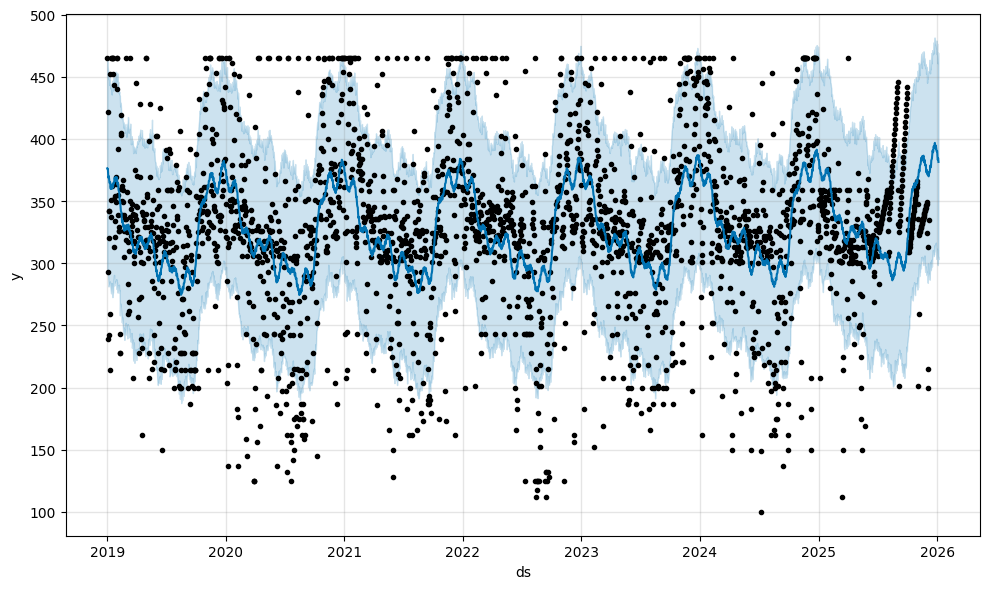

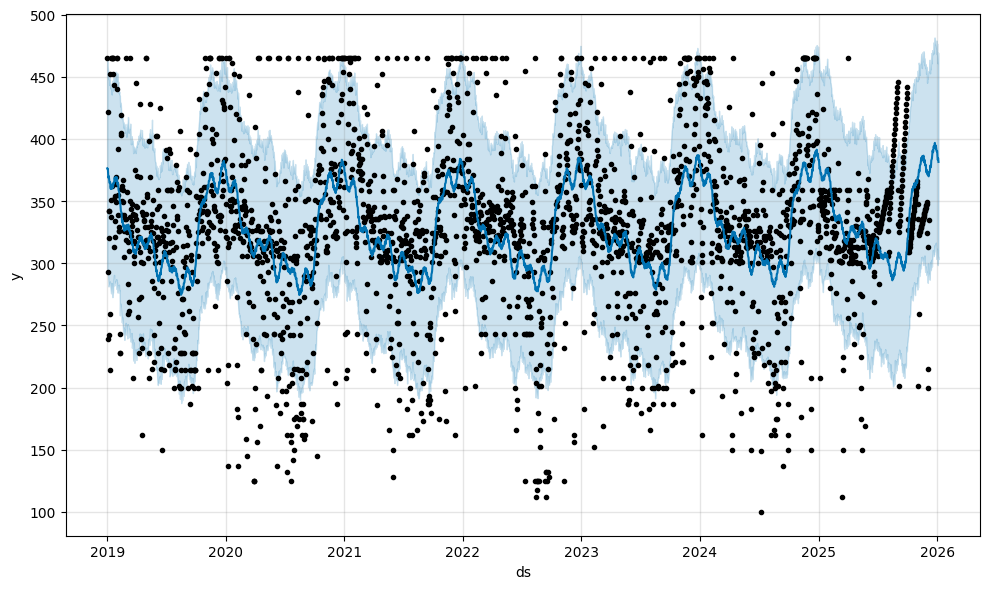

In [ ]:
model = Prophet()

model.fit(df_city)

future = model.make_future_dataframe(periods=30)

# Predict
forecast = model.predict(future)

# Plot
model.plot(forecast)


In [ ]:
forecast

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2019-01-01  326.241210  294.502430  464.220229   326.241210   326.241210   
1    2019-01-02  326.232631  292.544833  458.686639   326.232631   326.232631   
2    2019-01-03  326.224052  294.825334  456.745380   326.224052   326.224052   
3    2019-01-04  326.215473  288.034635  453.831757   326.215473   326.215473   
4    2019-01-05  326.206895  281.365618  449.164515   326.206895   326.206895   
...         ...         ...         ...         ...          ...          ...   
2557 2026-01-01  337.743678  311.740542  476.716080   337.743196   337.744204   
2558 2026-01-02  337.757916  300.363460  460.842556   337.757277   337.758844   
2559 2026-01-03  337.772153  298.553414  463.739617   337.771176   337.773558   
2560 2026-01-04  337.786390  305.328122  469.415495   337.785007   337.788294   
2561 2026-01-05  337.800628  303.499713  464.407076   337.798951   337.802721   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0          50.114780             50.114780             50.114780 -0.856975   
1          49.564653             49.564653             49.564653  0.222437   
2          49.715502             49.715502             49.715502  2.081658   
3          44.957439             44.957439             44.957439 -0.932624   
4          42.363108             42.363108             42.363108 -1.791414   
...              ...                   ...                   ...       ...   
2557       52.655750             52.655750             52.655750  2.081658   
2558       47.988208             47.988208             47.988208 -0.932624   
2559       45.408094             45.408094             45.408094 -1.791414   
2560       46.749689             46.749689             46.749689  1.295975   
2561       43.707902             43.707902             43.707902 -0.019057   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0        -0.856975     -0.856975  50.971756     50.971756     50.971756   
1         0.222437      0.222437  49.342215     49.342215     49.342215   
2         2.081658      2.081658  47.633844     47.633844     47.633844   
3        -0.932624     -0.932624  45.890064     45.890064     45.890064   
4        -1.791414     -1.791414  44.154521     44.154521     44.154521   
...            ...           ...        ...           ...           ...   
2557      2.081658      2.081658  50.574092     50.574092     50.574092   
2558     -0.932624     -0.932624  48.920832     48.920832     48.920832   
2559     -1.791414     -1.791414  47.199508     47.199508     47.199508   
2560      1.295975      1.295975  45.453714     45.453714     45.453714   
2561     -0.019057     -0.019057  43.726959     43.726959     43.726959   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
2557                   0.0                         0.0   
2558                   0.0                         0.0   
2559                   0.0                         0.0   
2560                   0.0                         0.0   
2561                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
0                            0.0  376.355990  
1                            0.0  375.797284  
2                            0.0  375.939555  
3                            0.0  371.172913  
4                            0.0  368.570002  
...                          ...         ...  
2557                         0.0  390.399428  
2558                         0.0  385.746124  
2559                         0.0  383.180247  
2560                         0.0  3

In [ ]:

aqid = forecast[forecast['ds'] == '2025-08-20']
aqid

ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2423 2025-08-20  335.835881  205.515092  369.156477   335.835881   335.835881   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2423      -46.376272            -46.376272            -46.376272  0.222437   

      weekly_lower  weekly_upper    yearly  yearly_lower  yearly_upper  \
2423      0.222437      0.222437 -46.59871     -46.59871     -46.59871   

      multiplicative_terms  multiplicative_terms_lower  \
2423                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
2423                         0.0  289.459609

In [ ]:
user_input = input("Enter a date (YYYY-MM-DD): ")
input_date = pd.to_datetime(user_input)

# --- Step 4: Look up prediction for that date ---
result = forecast[forecast['ds'] == input_date]

Enter a date (YYYY-MM-DD): 2026-09-28


In [ ]:
data

city       date   pm25   pm10    o3   no2  so2    co  \
0      thiruvananthapuram 2025-01-06   48.0   24.0   6.0   5.0  5.0   2.0   
1      thiruvananthapuram 2025-02-06   45.0   23.0   6.0   5.0  6.0   2.0   
2      thiruvananthapuram 2025-03-06   44.0   22.0   6.0   6.0  6.0   3.0   
3      thiruvananthapuram 2025-04-06   44.0   33.0   6.0   6.0  6.0   2.0   
4      thiruvananthapuram 2025-05-06   63.0   44.0   6.0   5.0  6.0   2.0   
...                   ...        ...    ...    ...   ...   ...  ...   ...   
76214               noida 2020-02-04  143.0  118.0  16.0  27.0  6.0   9.0   
76215               noida 2020-03-12  143.0   86.0  30.0  11.0  4.0  21.0   
76216               noida 2019-11-17  143.0  118.0  13.0  46.5  7.0  11.0   
76217               noida 2019-12-10  143.0  249.0  28.0  46.5  7.0  20.0   
76218               noida 2019-09-13  143.0   49.0  14.0   7.0  6.0  10.0   

       day  month  year  aqi pollutant  
0        6      1  2025  100        co  
1        6      2  2025  100        co  
2        6      3  2025  112        co  
3        6      4  2025  100        co  
4        6      5  2025  108      pm25  
...    ...    ...   ...  ...       ...  
76214    4      2  2020  318      pm25  
76215   12      3  2020  324        co  
76216   17     11  2019  318      pm25  
76217   10     12  2019  318      pm25  
76218   13      9  2019  318      pm25  

[71283 rows x 13 columns]

In [ ]:

city_input = input("Enter city name: ").strip()
date_input = input("Enter date to predict (YYYY-MM-DD): ").strip()


df_city = data[data['city'].str.lower() == city_input.lower()][['date', 'aqi']].copy()
df_city = df_city.rename(columns={'date': 'ds', 'aqi': 'y'})
df_city = df_city.set_index('ds').asfreq('D')
df_city['y'] = df_city['y'].interpolate()
df_city = df_city.reset_index()
model = Prophet()
model.fit(df_city)

future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)


target = forecast[forecast['ds'] == pd.to_datetime(date_input)]
print(target,"this s")
if not target.empty:
  predicted_aqi = round(target['yhat'].values[0], 2)
  get_aqi_category(predicted_aqi)


  print(f"\n📍 Predicted AQI for {city_input.title()} on {date_input}: {predicted_aqi}")
  print(f"🧾 AQI Category: {get_aqi_category(predicted_aqi)}")
else:
  print("⚠️ Date out of range or invalid. Try a date within ~30–60 days from the last available data.")


Enter city name: kochi
Enter date to predict (YYYY-MM-DD): 2026-01-10


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/s_7q1d5i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/x6097f1x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67808', 'data', 'file=/tmp/tmp_wpyfnl8/s_7q1d5i.json', 'init=/tmp/tmp_wpyfnl8/x6097f1x.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model6sowrd19/prophet_model-20250719095551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:55:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:55:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
2387 2026-01-10  265.584249  249.908271  347.476723   257.889979   272.057395   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
2387       33.506227             33.506227             33.506227  1.200399   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
2387      1.200399      1.200399  32.305828     32.305828     32.305828   

      multiplicative_terms  multiplicative_terms_lower  \
2387                   0.0                         0.0   

      multiplicative_terms_upper        yhat  
2387                         0.0  299.090476   this s

📍 Predicted AQI for Kochi on 2026-01-10: 299.09
🧾 AQI Category: Very Unhealthy


In [ ]:

import joblib

!mkdir -p /content/models

for city in data['city'].unique():
    print(f"Training model for {city}...")

    df_city = data[data['city'].str.lower() == city.lower()][['date', 'aqi']].copy()
    df_city = df_city.rename(columns={'date': 'ds', 'aqi': 'y'})

    df_city = df_city.set_index('ds').asfreq('D')
    df_city['y'] = df_city['y'].interpolate()
    df_city = df_city.reset_index()

    if len(df_city) < 2:
        print(f"Skipping {city}: Not enough data to train.")
        continue

    model = Prophet()
    model.fit(df_city)

    model_filename = f"/content/models/prophet_model_{city.replace(' ', '_').lower()}.pkl"

    joblib.dump(model, model_filename)

    print(f"Model for {city} trained and saved to {model_filename}")

print("\nAll models trained and saved.")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/yrh6dld7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/pfdwj1vd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76980', 'data', 'file=/tmp/tmp_wpyfnl8/yrh6dld7.json', 'init=/tmp/tmp_wpyfnl8/pfdwj1vd.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelpxgj2pg_/prophet_model-20250719095310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for thiruvananthapuram


09:53:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for thiruvananthapuram saved to prophet_models/prophet_model_thiruvananthapuram.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/bn4ihtky.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/763uvbi0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61632', 'data', 'file=/tmp/tmp_wpyfnl8/bn4ihtky.json', 'init=/tmp/tmp_wpyfnl8/763uvbi0.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model898wmopi/prophet_model-20250719095310.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for kolkata


09:53:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for kolkata saved to prophet_models/prophet_model_kolkata.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/9uac81lr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/5osc15ps.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51372', 'data', 'file=/tmp/tmp_wpyfnl8/9uac81lr.json', 'init=/tmp/tmp_wpyfnl8/5osc15ps.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modeljen2o506/prophet_model-20250719095311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for mumbai


09:53:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for mumbai saved to prophet_models/prophet_model_mumbai.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/zuqkvpcc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/w7719hbg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75529', 'data', 'file=/tmp/tmp_wpyfnl8/zuqkvpcc.json', 'init=/tmp/tmp_wpyfnl8/w7719hbg.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model4lm6l1a1/prophet_model-20250719095312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for delhi


09:53:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for delhi saved to prophet_models/prophet_model_delhi.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/hvvgpoov.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/hxa0ehlq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11094', 'data', 'file=/tmp/tmp_wpyfnl8/hvvgpoov.json', 'init=/tmp/tmp_wpyfnl8/hxa0ehlq.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modele8sl1_p6/prophet_model-20250719095312.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for chennai


09:53:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for chennai saved to prophet_models/prophet_model_chennai.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/9dh86640.json


Training model for bengaluru


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/qhgarhob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59369', 'data', 'file=/tmp/tmp_wpyfnl8/9dh86640.json', 'init=/tmp/tmp_wpyfnl8/qhgarhob.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelfgnfr738/prophet_model-20250719095313.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for bengaluru saved to prophet_models/prophet_model_bengaluru.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/g_e4gh91.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/rpj2h5v9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87538', 'data', 'file=/tmp/tmp_wpyfnl8/g_e4gh91.json', 'init=/tmp/tmp_wpyfnl8/rpj2h5v9.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model8a88m904/prophet_model-20250719095314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for lucknow


09:53:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for lucknow saved to prophet_models/prophet_model_lucknow.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/gxkexo5s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/3m7yyn41.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40888', 'data', 'file=/tmp/tmp_wpyfnl8/gxkexo5s.json', 'init=/tmp/tmp_wpyfnl8/3m7yyn41.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelsm6n32ke/prophet_model-20250719095314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for jaipur


09:53:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for jaipur saved to prophet_models/prophet_model_jaipur.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/vwesfy1n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/050sls9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78124', 'data', 'file=/tmp/tmp_wpyfnl8/vwesfy1n.json', 'init=/tmp/tmp_wpyfnl8/050sls9f.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelvbw6ynqu/prophet_model-20250719095315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for hyderabad


09:53:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for hyderabad saved to prophet_models/prophet_model_hyderabad.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/refgvwq2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/hjy7a3sb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81792', 'data', 'file=/tmp/tmp_wpyfnl8/refgvwq2.json', 'init=/tmp/tmp_wpyfnl8/hjy7a3sb.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelf8f52x5l/prophet_model-20250719095315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for patna


09:53:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for patna saved to prophet_models/prophet_model_patna.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/iwb35kp4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/0ovw7qr_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56167', 'data', 'file=/tmp/tmp_wpyfnl8/iwb35kp4.json', 'init=/tmp/tmp_wpyfnl8/0ovw7qr_.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modeli0kdqav7/prophet_model-20250719095316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for dispur


09:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for dispur saved to prophet_models/prophet_model_dispur.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/t8rdbae5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/sdiznodd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33278', 'data', 'file=/tmp/tmp_wpyfnl8/t8rdbae5.json', 'init=/tmp/tmp_wpyfnl8/sdiznodd.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelrj0hkbb3/prophet_model-20250719095316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for amaravati


09:53:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for amaravati saved to prophet_models/prophet_model_amaravati.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/oo5b4t1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/q73inw4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20118', 'data', 'file=/tmp/tmp_wpyfnl8/oo5b4t1l.json', 'init=/tmp/tmp_wpyfnl8/q73inw4x.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model0yj32xp6/prophet_model-20250719095317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for itanagar
Model for itanagar saved to prophet_models/prophet_model_itanagar.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/zixdz5ok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/q9zrwf0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84534', 'data', 'file=/tmp/tmp_wpyfnl8/zixdz5ok.json', 'init=/tmp/tmp_wpyfnl8/q9zrwf0r.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model5y4lgre0/prophet_model-20250719095317.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:17 - cmdstanpy - INFO - Chain [1] done processing


Training model for bengal


INFO:cmdstanpy:Chain [1] done processing


Model for bengal saved to prophet_models/prophet_model_bengal.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/_609p4is.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/_g_u3f6t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=893', 'data', 'file=/tmp/tmp_wpyfnl8/_609p4is.json', 'init=/tmp/tmp_wpyfnl8/_g_u3f6t.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelvge34g2a/prophet_model-20250719095318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for punjab


09:53:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for punjab saved to prophet_models/prophet_model_punjab.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/rvfj9ld6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/bn5l67bk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16945', 'data', 'file=/tmp/tmp_wpyfnl8/rvfj9ld6.json', 'init=/tmp/tmp_wpyfnl8/bn5l67bk.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelh03q54j4/prophet_model-20250719095318.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for indore


09:53:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for indore saved to prophet_models/prophet_model_indore.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/2kp6c5x4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/ze_y9nvl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87864', 'data', 'file=/tmp/tmp_wpyfnl8/2kp6c5x4.json', 'init=/tmp/tmp_wpyfnl8/ze_y9nvl.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modeldebwsi05/prophet_model-20250719095319.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for udaipur


09:53:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for udaipur saved to prophet_models/prophet_model_udaipur.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/a22feb79.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/26qjmeib.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51316', 'data', 'file=/tmp/tmp_wpyfnl8/a22feb79.json', 'init=/tmp/tmp_wpyfnl8/26qjmeib.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelp8ke3d9w/prophet_model-20250719095320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for ahmedabad


09:53:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for ahmedabad saved to prophet_models/prophet_model_ahmedabad.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/ee4m5aul.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/dbwc3g2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94706', 'data', 'file=/tmp/tmp_wpyfnl8/ee4m5aul.json', 'init=/tmp/tmp_wpyfnl8/dbwc3g2b.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelup0u_xsk/prophet_model-20250719095320.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for dindigul
Model for dindigul saved to prophet_models/prophet_model_dindigul.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/twrjrg64.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/gmtq3a3o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96350', 'data', 'file=/tmp/tmp_wpyfnl8/twrjrg64.json', 'init=/tmp/tmp_wpyfnl8/gmtq3a3o.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model5none20v/prophet_model-20250719095321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for coimbatore


09:53:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for coimbatore saved to prophet_models/prophet_model_coimbatore.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/542iymtp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/8mf6av08.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92868', 'data', 'file=/tmp/tmp_wpyfnl8/542iymtp.json', 'init=/tmp/tmp_wpyfnl8/8mf6av08.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model_dvuszj8/prophet_model-20250719095321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for kochi


09:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for kochi saved to prophet_models/prophet_model_kochi.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/53vary8m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/8t04wqiu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92863', 'data', 'file=/tmp/tmp_wpyfnl8/53vary8m.json', 'init=/tmp/tmp_wpyfnl8/8t04wqiu.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelcydh_nc7/prophet_model-20250719095322.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for mysuru
Model for mysuru saved to prophet_models/prophet_model_mysuru.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/8jha6vvk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/ac2o4bcd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62092', 'data', 'file=/tmp/tmp_wpyfnl8/8jha6vvk.json', 'init=/tmp/tmp_wpyfnl8/ac2o4bcd.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelh3khw6z0/prophet_model-20250719095323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for kannur


09:53:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for kannur saved to prophet_models/prophet_model_kannur.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/0chswkwk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/acy400b8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10717', 'data', 'file=/tmp/tmp_wpyfnl8/0chswkwk.json', 'init=/tmp/tmp_wpyfnl8/acy400b8.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model3wpsfenv/prophet_model-20250719095323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for mangalore
Model for mangalore saved to prophet_models/prophet_model_mangalore.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/d2yh_57m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/9kadxhd9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56884', 'data', 'file=/tmp/tmp_wpyfnl8/d2yh_57m.json', 'init=/tmp/tmp_wpyfnl8/9kadxhd9.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelj8nh199m/prophet_model-20250719095323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for visakhapatnam


09:53:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for visakhapatnam saved to prophet_models/prophet_model_visakhapatnam.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/nq_nstbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/rnb8te7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34999', 'data', 'file=/tmp/tmp_wpyfnl8/nq_nstbf.json', 'init=/tmp/tmp_wpyfnl8/rnb8te7w.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model_2u445u1/prophet_model-20250719095324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for varanasi
Model for varanasi saved to prophet_models/prophet_model_varanasi.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/to1l857n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/rt4ynnhu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18080', 'data', 'file=/tmp/tmp_wpyfnl8/to1l857n.json', 'init=/tmp/tmp_wpyfnl8/rt4ynnhu.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modeljjec4b13/prophet_model-20250719095324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for patiala
Model for patiala saved to prophet_models/prophet_model_patiala.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/ztrusgx_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/nap8xc8x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93427', 'data', 'file=/tmp/tmp_wpyfnl8/ztrusgx_.json', 'init=/tmp/tmp_wpyfnl8/nap8xc8x.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model_ehaixdp/prophet_model-20250719095325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for moradabad
Model for moradabad saved to prophet_models/prophet_model_moradabad.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/8e79dzno.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/73nv0tar.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57396', 'data', 'file=/tmp/tmp_wpyfnl8/8e79dzno.json', 'init=/tmp/tmp_wpyfnl8/73nv0tar.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model6lqouy79/prophet_model-20250719095325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for bareilly
Model for bareilly saved to prophet_models/prophet_model_bareilly.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/ist9s36z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/gf8mnw3d.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96949', 'data', 'file=/tmp/tmp_wpyfnl8/ist9s36z.json', 'init=/tmp/tmp_wpyfnl8/gf8mnw3d.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model7dhbbt65/prophet_model-20250719095325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for aizawl
Model for aizawl saved to prophet_models/prophet_model_aizawl.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/6q__1fok.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/s42epk7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37196', 'data', 'file=/tmp/tmp_wpyfnl8/6q__1fok.json', 'init=/tmp/tmp_wpyfnl8/s42epk7w.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model4f9xh790/prophet_model-20250719095326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for puducherry
Model for puducherry saved to prophet_models/prophet_model_puducherry.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/utfvv8fj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/q62slzgs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66986', 'data', 'file=/tmp/tmp_wpyfnl8/utfvv8fj.json', 'init=/tmp/tmp_wpyfnl8/q62slzgs.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelkwjoztiz/prophet_model-20250719095326.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for vijayapura


09:53:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for vijayapura saved to prophet_models/prophet_model_vijayapura.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/bnm38pqn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/498oquf5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94329', 'data', 'file=/tmp/tmp_wpyfnl8/bnm38pqn.json', 'init=/tmp/tmp_wpyfnl8/498oquf5.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelkkcuc7d8/prophet_model-20250719095327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for gandhinagar


09:53:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for gandhinagar saved to prophet_models/prophet_model_gandhinagar.pkl
Training model for jodhpur


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/wrw5o60y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/d1e3eeqo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38360', 'data', 'file=/tmp/tmp_wpyfnl8/wrw5o60y.json', 'init=/tmp/tmp_wpyfnl8/d1e3eeqo.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelk3wllb9r/prophet_model-20250719095327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for jodhpur saved to prophet_models/prophet_model_jodhpur.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/_ptv30uf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/q5h6a78k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71994', 'data', 'file=/tmp/tmp_wpyfnl8/_ptv30uf.json', 'init=/tmp/tmp_wpyfnl8/q5h6a78k.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_model6g5kk7j2/prophet_model-20250719095328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for ajmer


09:53:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for ajmer saved to prophet_models/prophet_model_ajmer.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/75j53ro6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/ehxfi0rp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16913', 'data', 'file=/tmp/tmp_wpyfnl8/75j53ro6.json', 'init=/tmp/tmp_wpyfnl8/ehxfi0rp.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelrsjw7nwd/prophet_model-20250719095328.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Training model for jhansi
Model for jhansi saved to prophet_models/prophet_model_jhansi.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/uhxtnlcn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/of7sckms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48668', 'data', 'file=/tmp/tmp_wpyfnl8/uhxtnlcn.json', 'init=/tmp/tmp_wpyfnl8/of7sckms.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_models0k08cws/prophet_model-20250719095329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


Training model for gwalior


09:53:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for gwalior saved to prophet_models/prophet_model_gwalior.pkl


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/t88floeg.json


Training model for noida


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_wpyfnl8/2dxwa108.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81598', 'data', 'file=/tmp/tmp_wpyfnl8/t88floeg.json', 'init=/tmp/tmp_wpyfnl8/2dxwa108.json', 'output', 'file=/tmp/tmp_wpyfnl8/prophet_modelqsb93cp2/prophet_model-20250719095329.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:53:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:53:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model for noida saved to prophet_models/prophet_model_noida.pkl

Training complete for all cities.
Enter city name to predict for: kochi
Enter date to predict (YYYY-MM-DD): 2026-01-10

📍 Predicted AQI for Kochi on 2026-01-10: 299.09
🧾 AQI Category: Very Unhealthy
